# Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
killed_df =  pd.read_csv("../input/Road_Accidents_2017-Annuxure_Tables_3.csv")
injured_df =  pd.read_csv("../input/Road_Accidents_2017-Annuxure_Tables_4.csv")

weather_df =  pd.read_csv("../input/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv")
roadcond_df =  pd.read_csv("../input/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv")

# Data Cleanup

In [3]:
killed_df = killed_df.drop(columns = ['Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016'])
injured_df = injured_df.drop(columns = ['Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2016',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2017',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2016'])

In [4]:
killed_df = killed_df.rename(columns = {'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014':2014,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015':2015,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016':2016,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017':2017})
injured_df = injured_df.rename(columns = {'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014':2014,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015':2015,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016':2016,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017':2017})
roadcond_df =  roadcond_df.rename(columns = {'State/ UT':'States/UTs'})
weather_df =  weather_df.rename(columns = {'State/ UT':'States/UTs'})                          

#### Dividing States into Zones and Adding a Column

In [5]:
north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [6]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [7]:
killed_df.drop(killed_df[killed_df['States/UTs'] == 'Total'].index, inplace=True)
killed_df['Zones'] = killed_df.apply(get_zonal_names, axis=1)
injured_df.drop(injured_df[injured_df['States/UTs'] == 'Total'].index, inplace=True)
injured_df['Zones'] = injured_df.apply(get_zonal_names, axis=1)
roadcond_df.drop(roadcond_df[roadcond_df['States/UTs'] == 'Total'].index, inplace=True)
roadcond_df['Zones'] = roadcond_df.apply(get_zonal_names, axis=1)
weather_df.drop(weather_df[weather_df['States/UTs'] == 'Total'].index, inplace=True)
weather_df['Zones'] = weather_df.apply(get_zonal_names, axis=1)

#### Separating Features in the Weather and Road Condition Dataframe

In [8]:
total_col = [col for col in weather_df.columns if 'Total' in col]
killed_col = [col for col in weather_df.columns if 'Killed' in col]
injured_col = [col for col in weather_df.columns if 'Injured' in col]
weather_df_killed = weather_df.drop(columns = total_col+injured_col)
weather_df_injured = weather_df.drop(columns = total_col+killed_col)

In [9]:
total_col = [col for col in roadcond_df.columns if 'Accident' in col]
killed_col = [col for col in roadcond_df.columns if 'Killed' in col]
injured_col = [col for col in roadcond_df.columns if 'Injured' in col]
roadcond_df_killed = roadcond_df.drop(columns = total_col+injured_col)
roadcond_df_injured = roadcond_df.drop(columns = total_col+killed_col)

# Zone Wise No. of Accidents where People were Killed

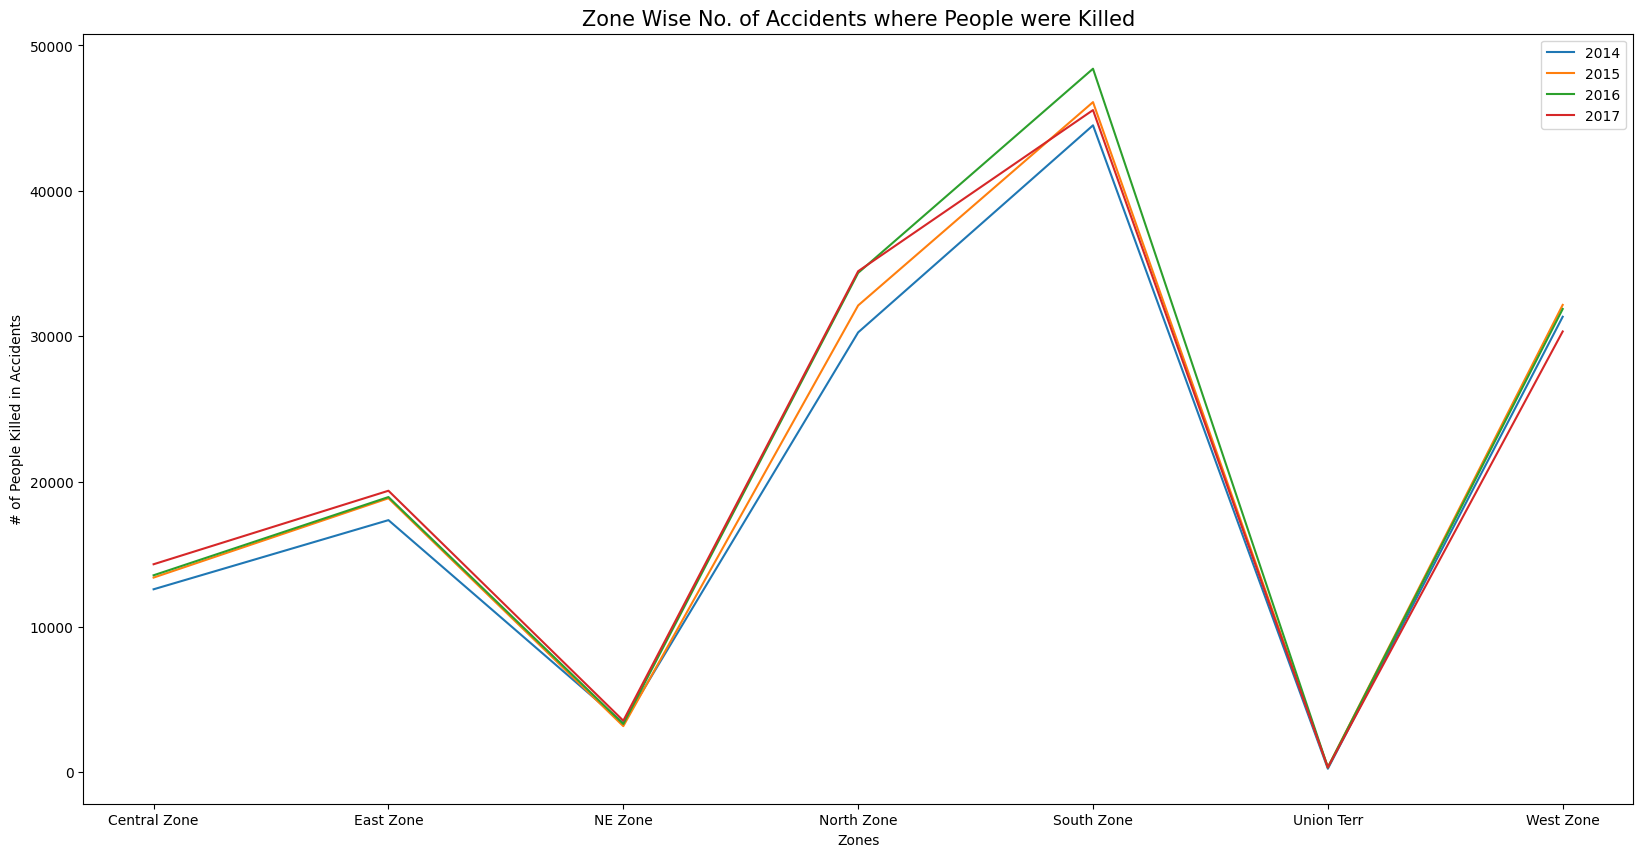

In [10]:
import warnings
warnings.filterwarnings('ignore')
df =pd.pivot_table(killed_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Killed', fontsize=15)

# Zone Wise No. of Accidents where People were Injured

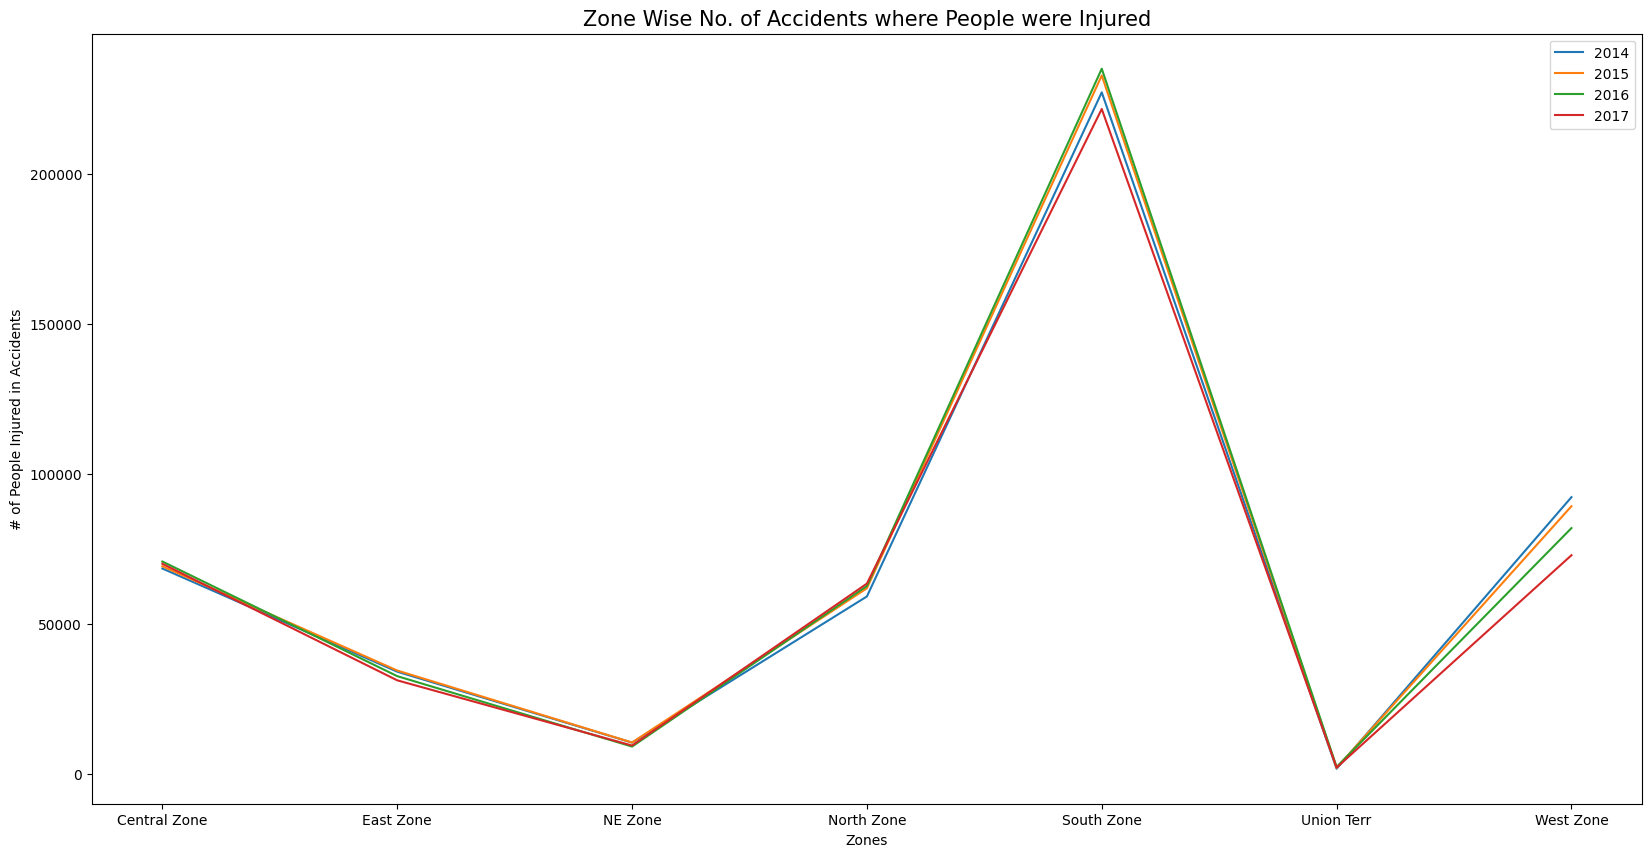

In [11]:
import warnings
warnings.filterwarnings('ignore')
df =pd.pivot_table(injured_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Injured', fontsize=15)

The south zone has the maximum number of people injured and killed in road accidents between 2014 and 2017. It is sad to see the plots are almost superimposed for each year. This shows how the trend remained the same for the four years.

South, North and West have high number of accidents where people were killed and south again has the highest count of injuries during road accidents. Let's explore the Southern Zone to see state-wise counts.

# Southern-Zone States: No. of Road Accidents where People were Killed

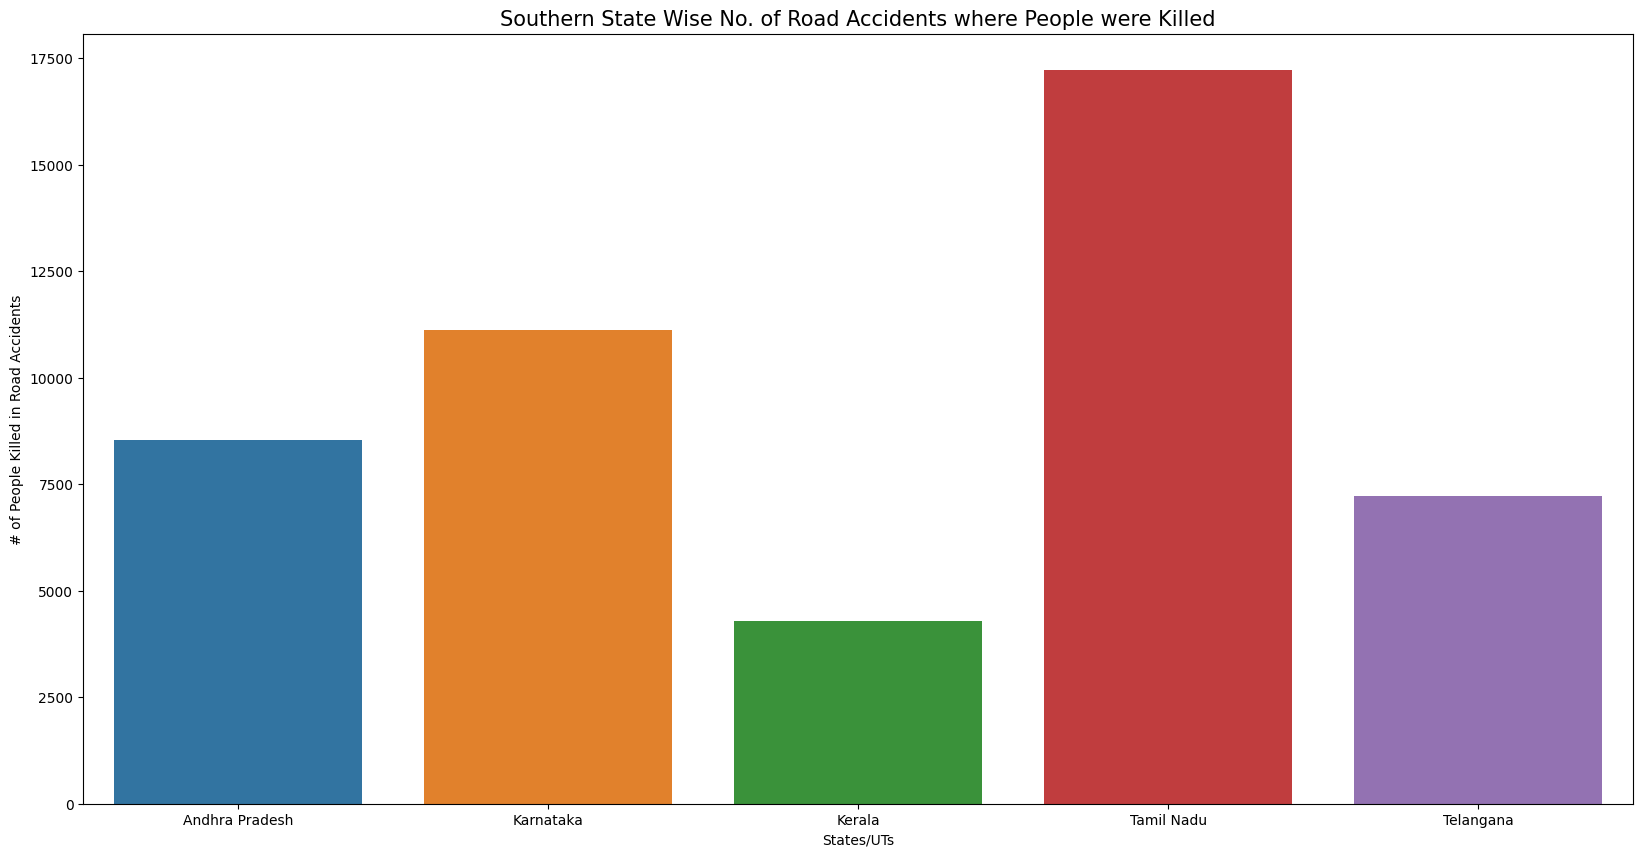

In [12]:

import warnings
warnings.filterwarnings('ignore')
sub_df = killed_df[killed_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Killed', fontsize=15)

# Southern-Zone States: No. of Road Accidents where People were Injured

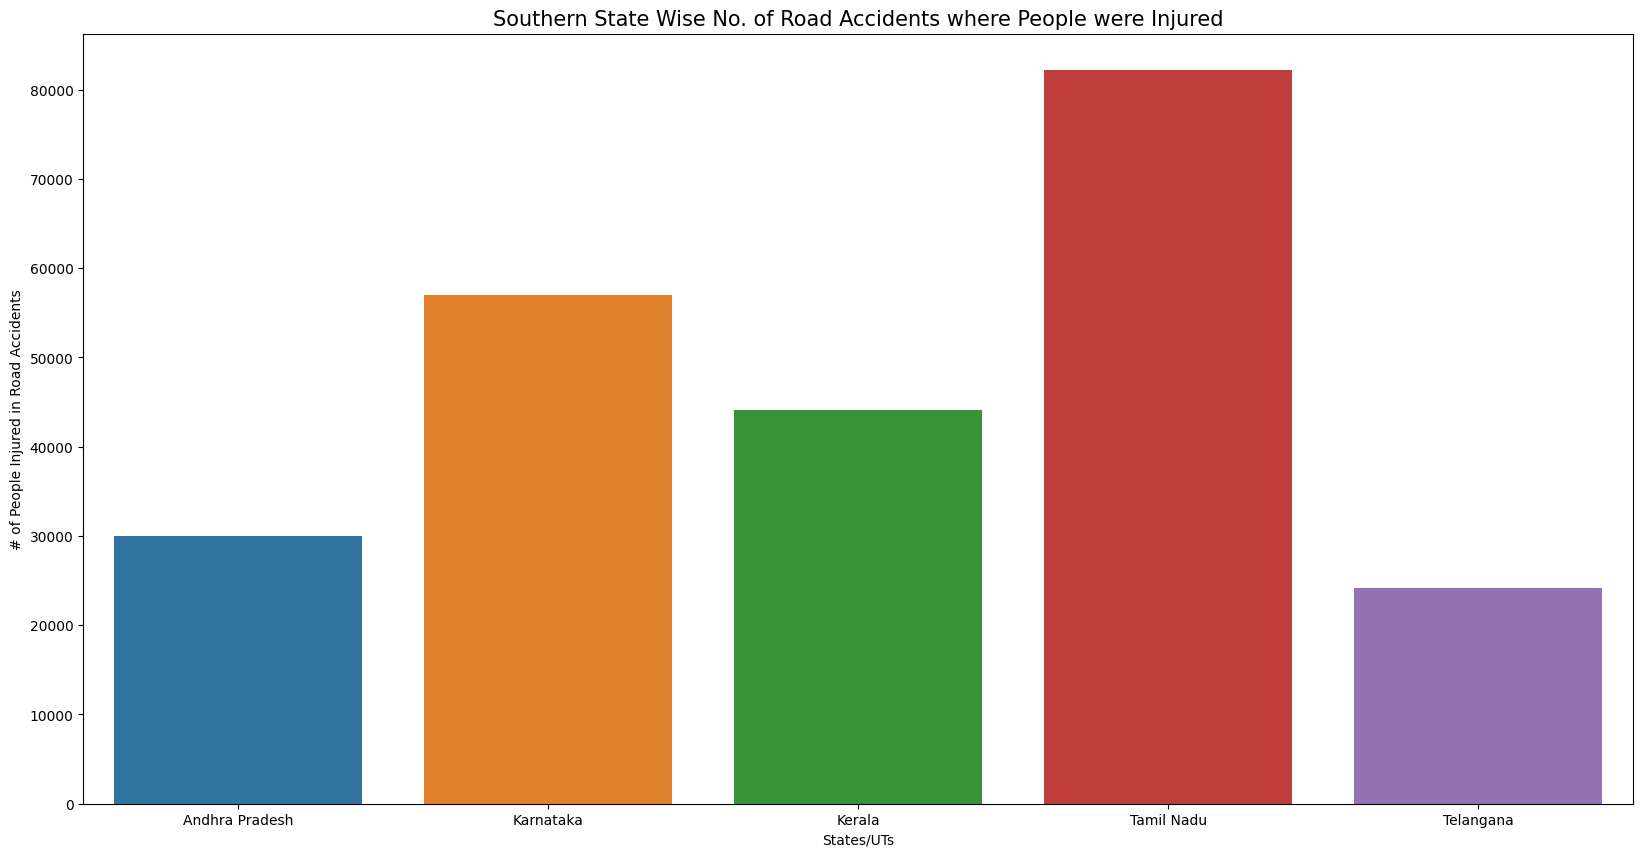

In [13]:
import warnings
warnings.filterwarnings('ignore')
sub_df = injured_df[injured_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Injured in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Injured', fontsize=15)

Tamil Nadu reports the highest number of people killed and injured in road accidents, followed by Karnataka. At this point, let us use the other data files we have to see what probable causes.

As per the TOI article, below stats now makes sense as we see the same trend for TN(South), UP(North) and Maharashtra(West)

![TOI](https://static.toiimg.com/photo/imgsize-153835,msid-72078568/72078568.jpg)

Business Standard article staes, there has been a decline in the total number of road accidents as compared with the year 2016. In percentage terms, the number of accidents in 2017 was lower by 3.3 per cent and injuries by 4.8 per cent over that of the previous year. Similarly, the number of persons killed in road accidents during 2017 was less than that of 2016 by 1.9 per cent.

Source - https://www.business-standard.com/article/current-affairs/roads-accidents-led-to-three-deaths-every-minute-in-india-in-2017-report-118083000440_1.html

We see this in our year charts too. Now lets look at if weather and its impacts on road accidents.

# Weather Conditions - No. of People Killed in Road Accidents (South Zone)

The data is available for only 2014 and 2016. We'll look at the top ten weather conditions during the road accidents across both the years.

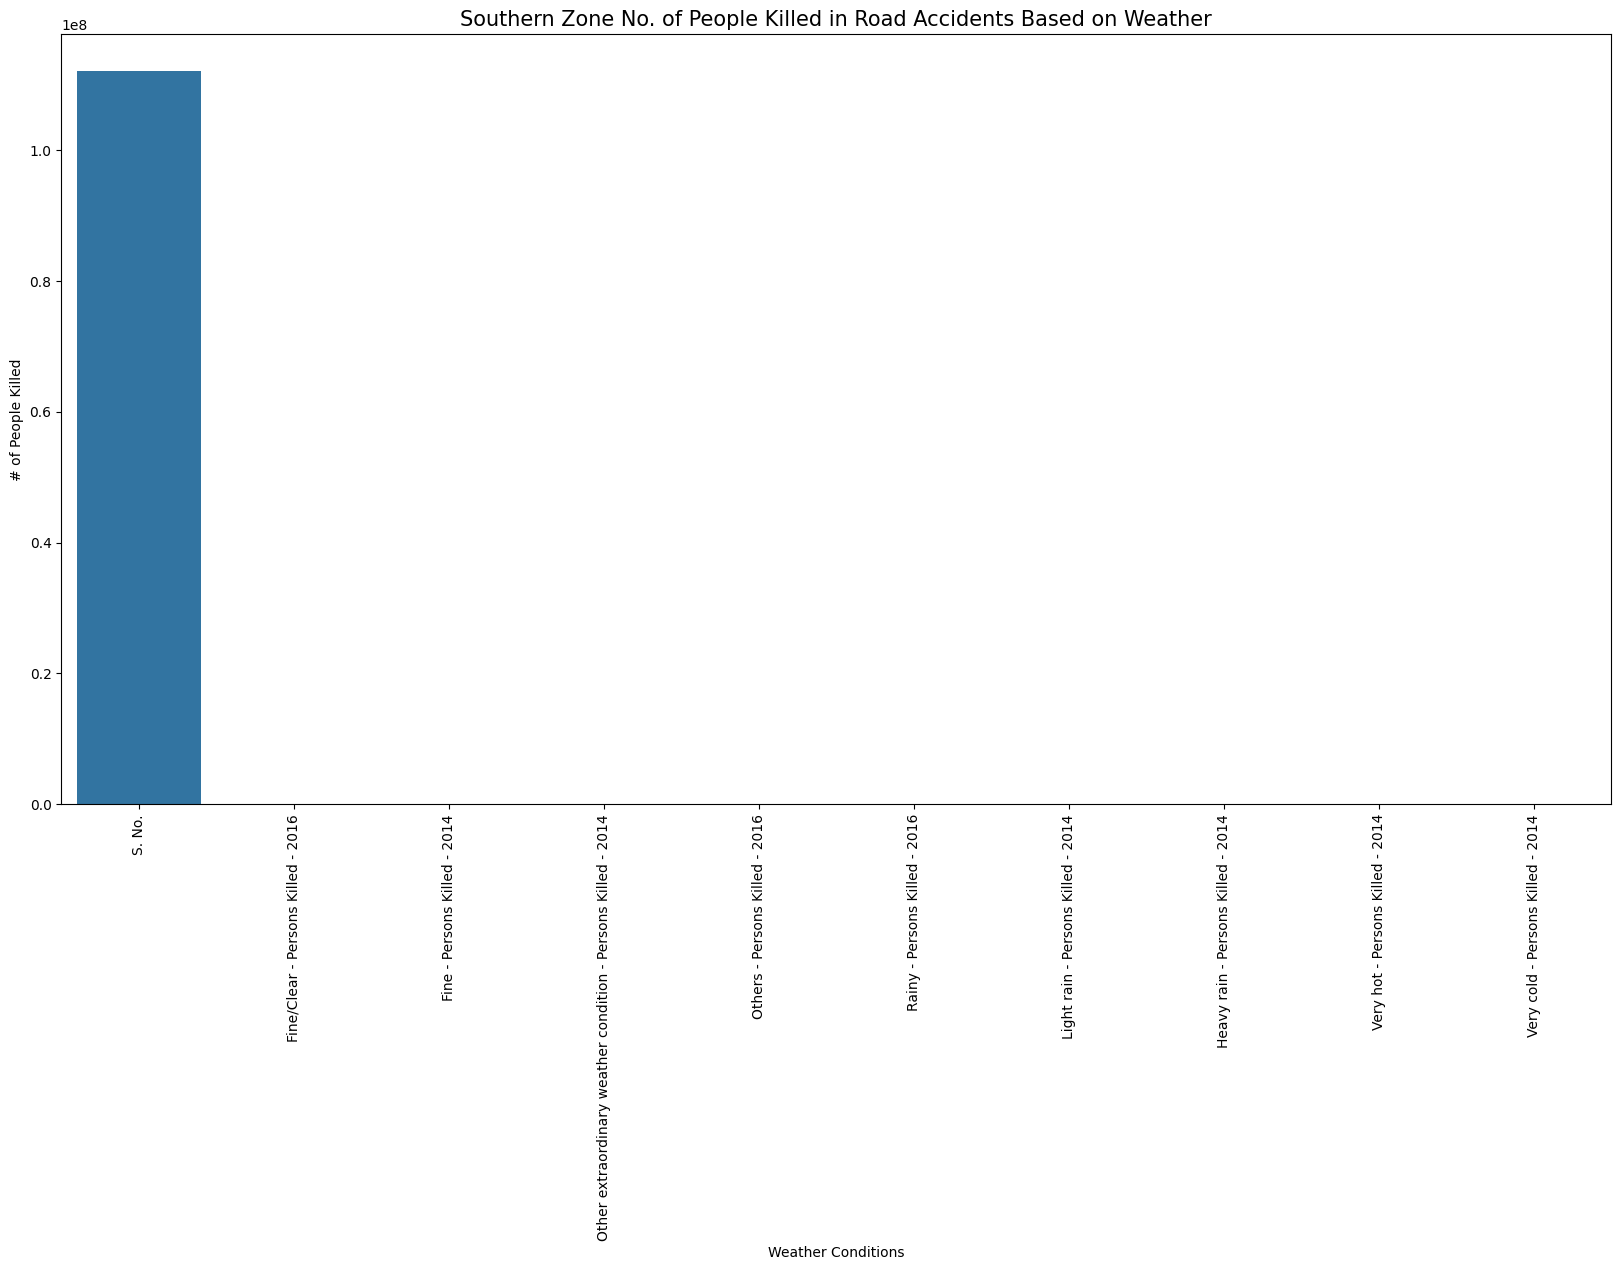

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the South Zone
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']

# Create pivot table, specifying the numeric column to sum (e.g., 'Killed')
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc='sum').reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns for clarity
df = df.rename(columns={'index': 'Weather Conditions', 0: 'Total'})

# Drop the first row (which contains column names)
df = df.iloc[1:]

# Convert 'Total' column to numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop rows with NaN values in 'Total'
df = df.dropna(subset=['Total'])

# Sort values by 'Total' in descending order and keep top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Weather Conditions'], y=df['Total'], ax=ax)
plt.ylabel('# of People Killed')
plt.title('Southern Zone No. of People Killed in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)
plt.show()

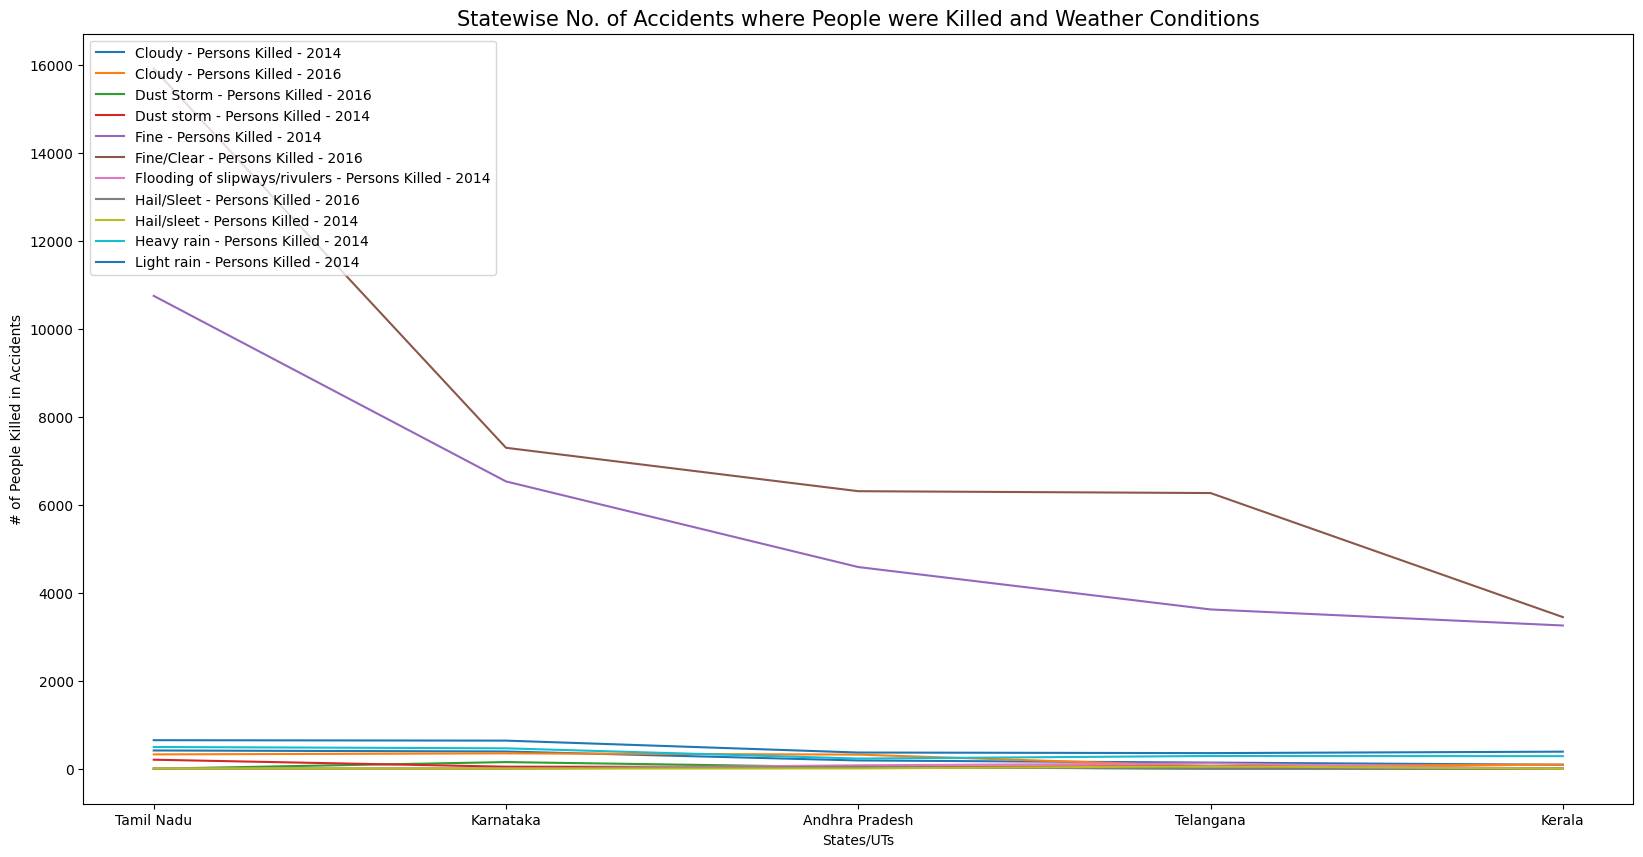

In [15]:
import warnings
warnings.filterwarnings('ignore')
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

Most of the accidents where people were killed happened when the weather was fine or had clear skies. 2016 reported around 38k accidents where people were killed while the weather was clear.
Since we're looking at southern zone, it is evident that we wont see weather conditions like 'hail or snow'
The more prevalent weather conditions are rainy/cloudy which the graph shows. Let's similarly look for Injuries. There wont be much difference in the features or X axis. 

# Weather Conditions - No. of People Injured in Road Accidents (South Zone)

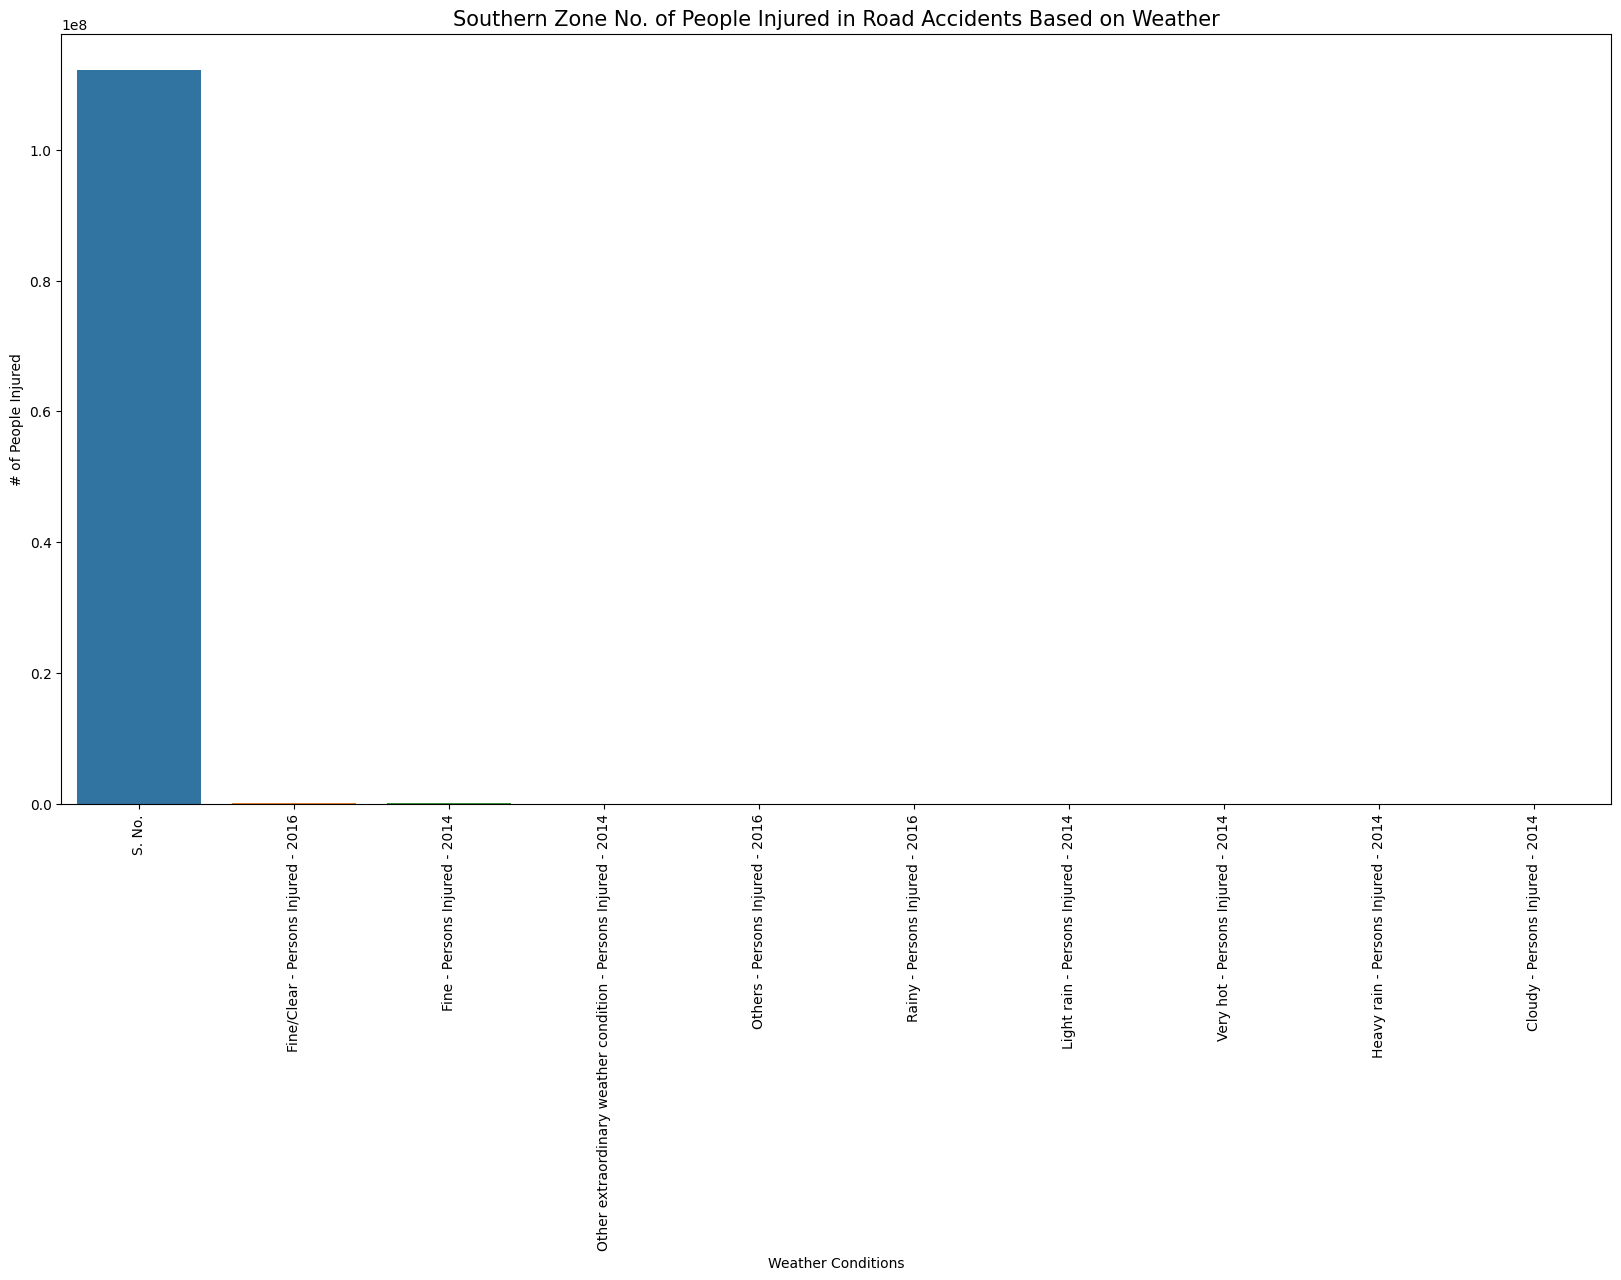

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the South Zone
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']

# Create pivot table: ensure numeric data by specifying 'Injured' column
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc='sum').reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns for clarity
df = df.rename(columns={'index': 'Weather Conditions', 0: 'Total'})

# Drop the first row (which contains column names)
df = df.iloc[1:]

# Convert 'Total' column to numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop rows with NaN values in 'Total'
df = df.dropna(subset=['Total'])

# Sort values by 'Total' in descending order and keep top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Weather Conditions'], y=df['Total'], ax=ax)
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)
plt.show()

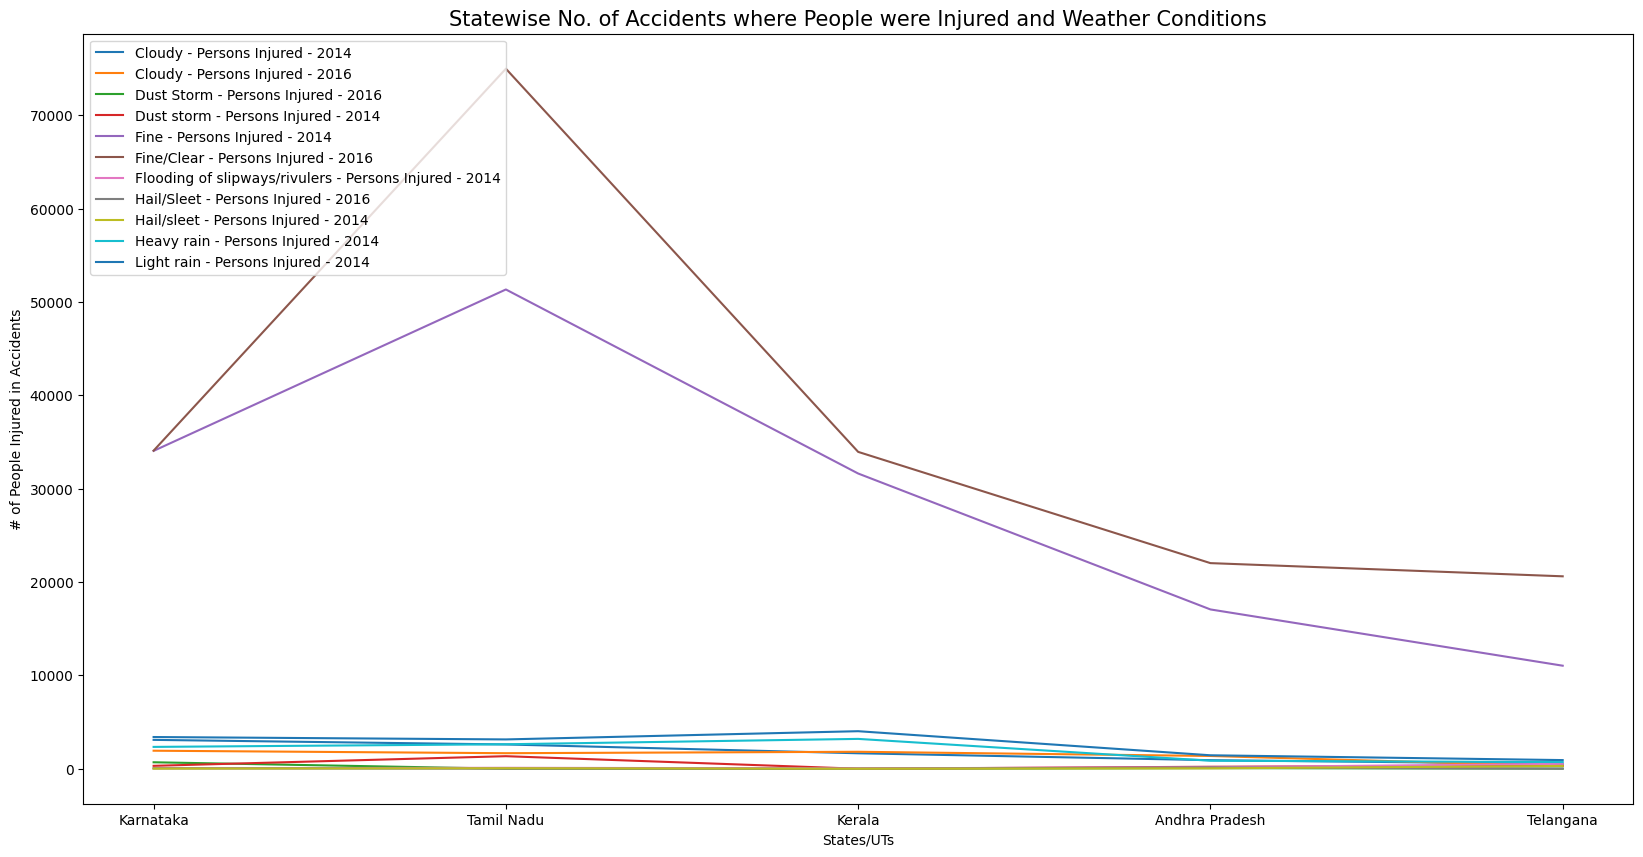

In [17]:
import warnings
warnings.filterwarnings('ignore')
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

As per the https://www.prsindia.org/policy/vital-stats/overview-road-accidents-india
Fewer accidents are caused due to neglect of civic bodies (2.8%), defect in motor vehicle (2.3%), and poor weather conditions (1.7%)

Though I cannot confirm for the first two, I see that poor weather condition was seldom the reason for a road accident. Here's another article which confrims this. https://www.financialexpress.com/india-news/over-70-percent-road-accidents-occurred-on-bright-sunny-days-report/1348638/

Now, that we have the weather details, let look at the road conditions to see how that affects the no. of people killed/injured in road accidents

# Road Conditions - No. of People Killed in Road Accidents (South Zone)

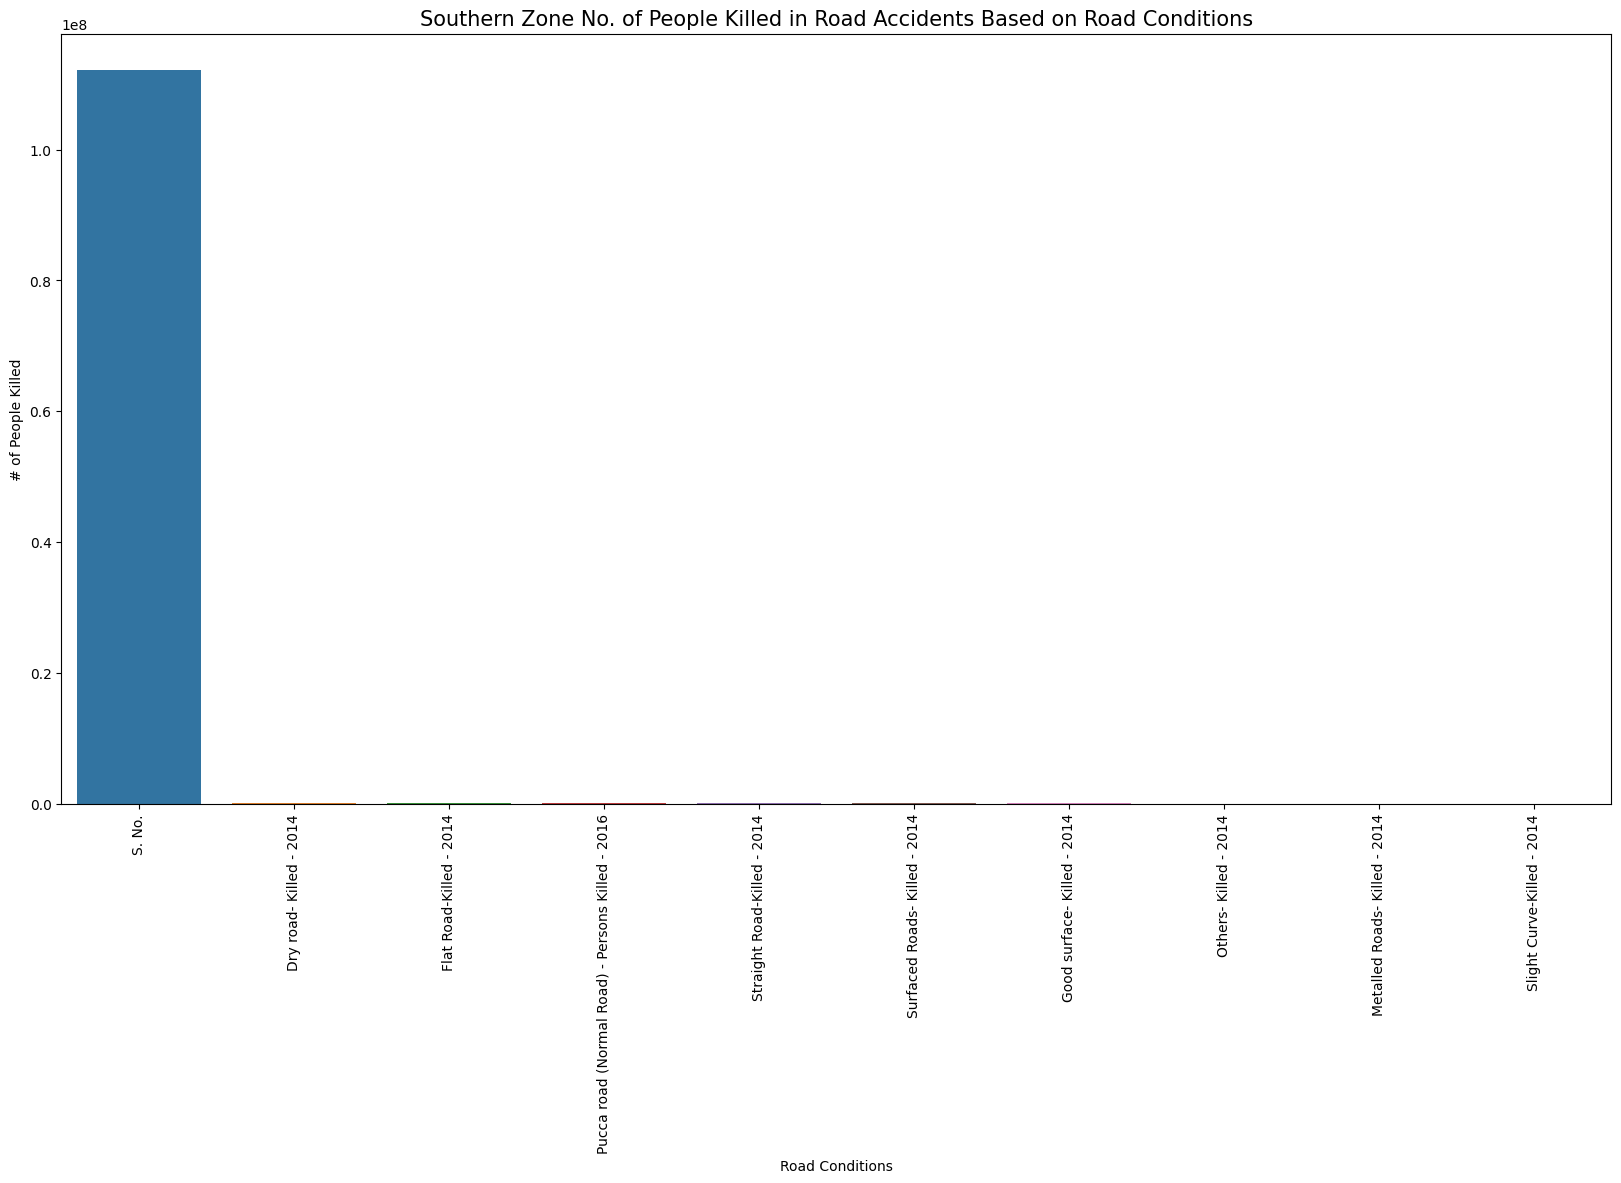

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the South Zone
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'South Zone']

# Create pivot table, specifying numeric columns
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc='sum').reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns for clarity
df = df.rename(columns={'index': 'Road Conditions', 0: 'Total'})

# Drop the first row (which contains column names)
df = df.iloc[1:]

# Convert 'Total' column to numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop rows with NaN values in 'Total'
df = df.dropna(subset=['Total'])

# Sort values by 'Total' in descending order and keep top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Road Conditions'], y=df['Total'], ax=ax)
plt.ylabel('# of People Killed')
plt.title('Southern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)
plt.show()

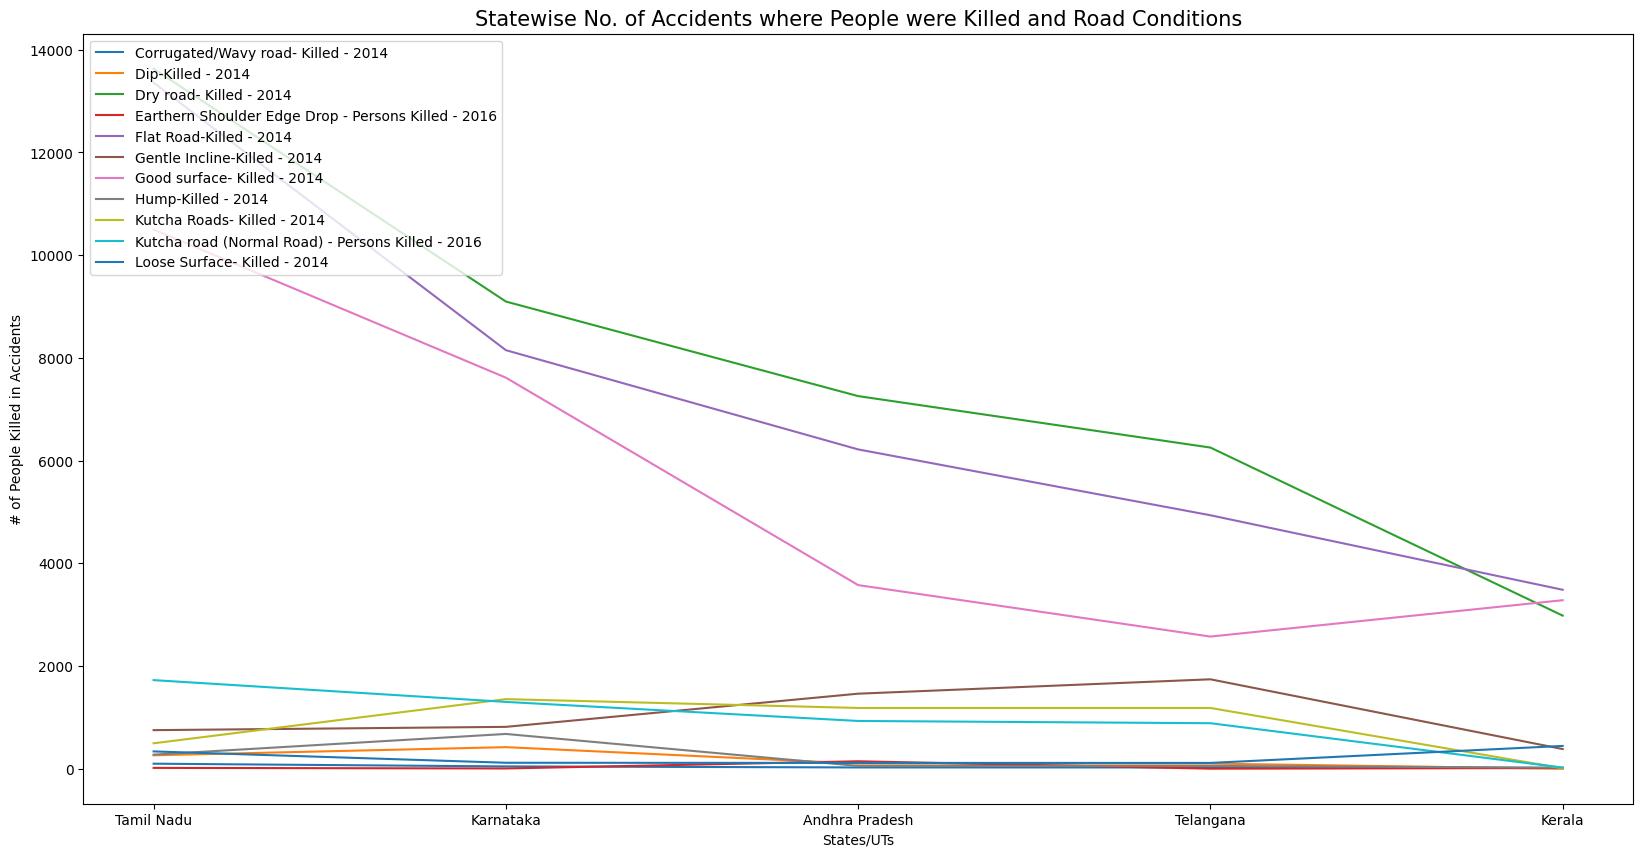

In [19]:
import warnings
warnings.filterwarnings('ignore')
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

# Road Conditions - No. of People Injured in Road Accidents (South Zone)

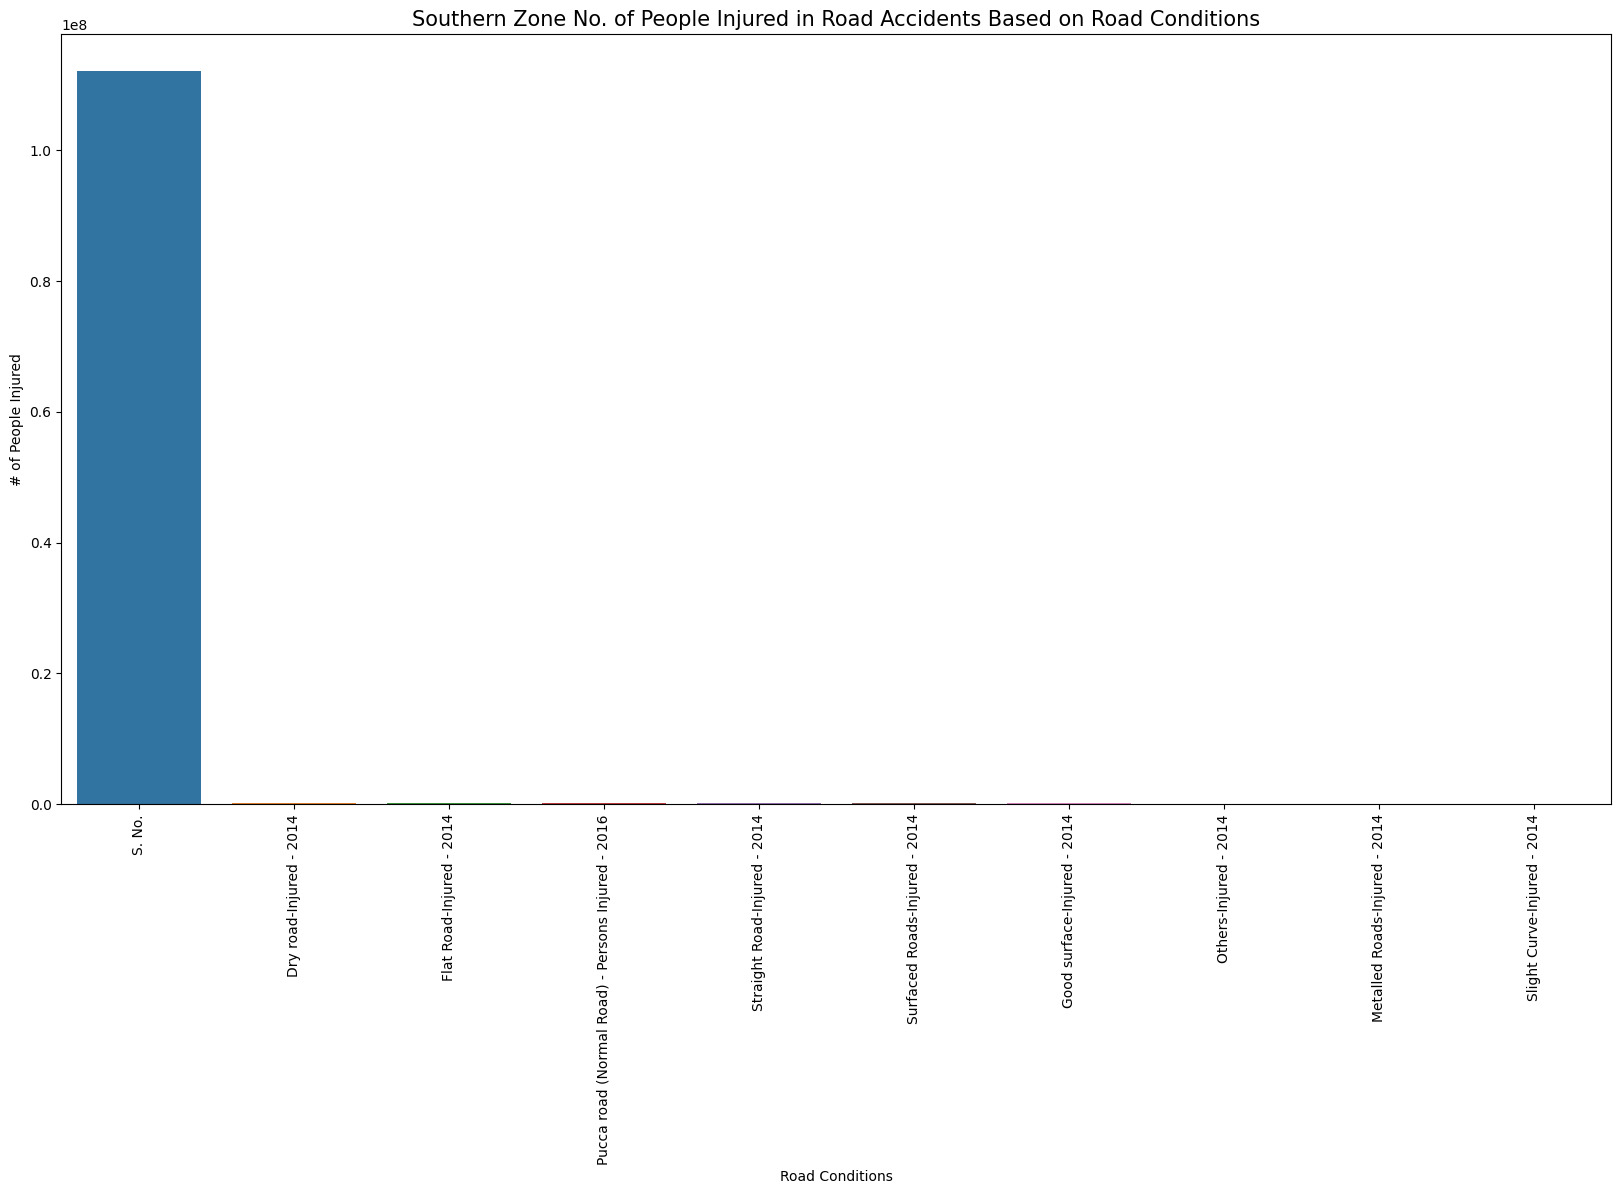

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for 'South Zone'
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'South Zone']

# Create pivot table
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc='sum').reset_index()

# Transpose the DataFrame and reset index
df = df.T.reset_index()

# Rename columns
df = df.rename(columns={'index': 'Road Conditions', 0: 'Total'})

# Drop the first row (if it's unnecessary)
df = df.iloc[1:]

# Convert 'Total' to numeric to avoid mixed data types
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop rows where 'Total' is NaN
df = df.dropna(subset=['Total'])

# Sort by 'Total' and keep top 10 rows
df = df.sort_values(by='Total', ascending=False).head(10)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Road Conditions'], y=df['Total'], ax=ax)
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)
plt.show()

The road conditions are fairly decent too. I was expecting roads with sharp curves to have a high number of accidents. 
Let's look at the Northern Zone now and perform a similar analysis.

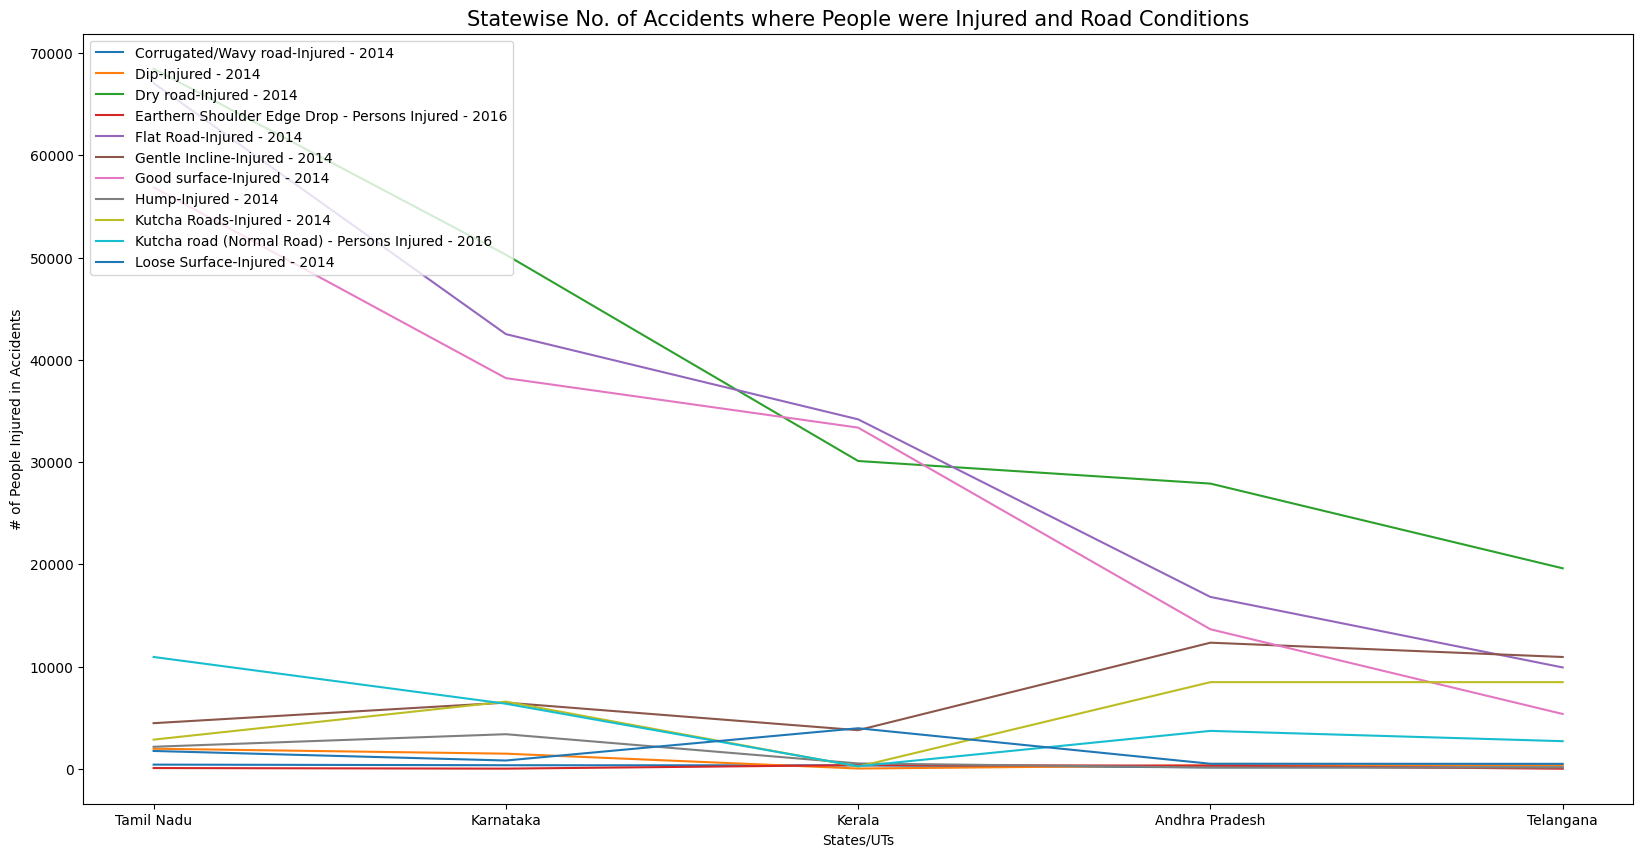

In [21]:
import warnings
warnings.filterwarnings('ignore')
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

As per the ET article cited earlier in the notebook,  aside from factoring safety considerations into the design of a road, the quality of Indian roads has seen a notable improvement over the past decade or so. For instance, an annual survey of business executives conducted by the World Economic Forum on the quality of roads in around 140 countries reflected that.
Between 2008 and 2018, India’s rank in road quality rose from 87 to 51. The share of paved roads in our road network has increased from half in March 2008 to nearly two-thirds in March 2016, according to the latest available figures. India has a road network of 5.6 million km, of which national highways contribute just 2% and state highways 3%. Rural roads account for the lion’s share, at 70%.


This zone-wise and state-wise comparison from two data sources eventually conclude on the same point that TN leads in Southern Zone with the most of people killed or injured in road accidents.


Let's perform a similar analysis for Northen Zone to check for UP. 

# Northern-Zone States: No. of Road Accidents where People were Killed

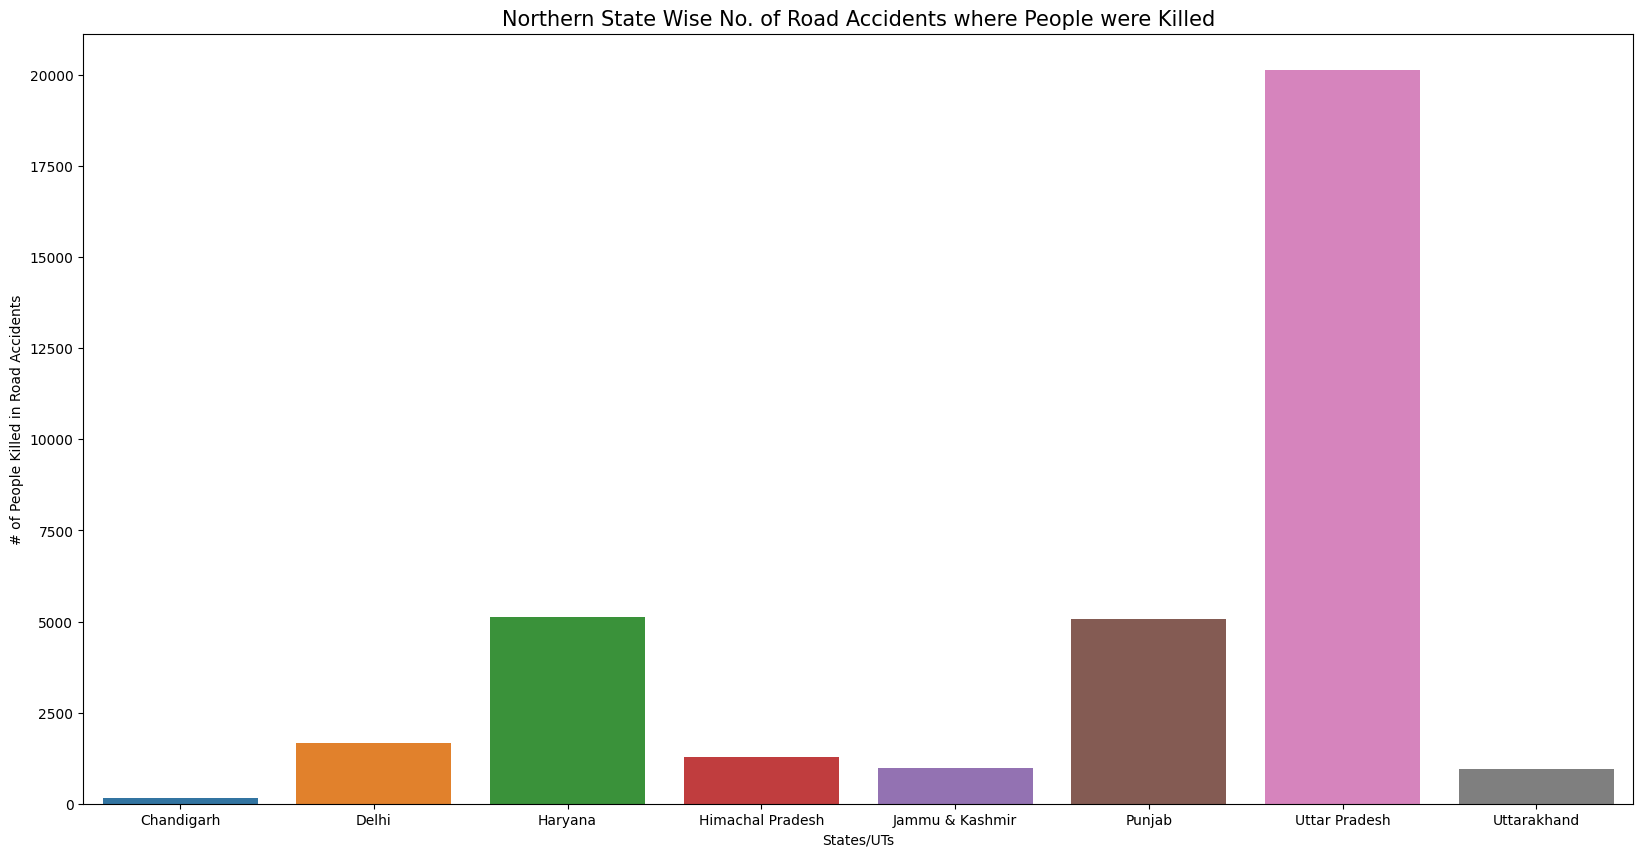

In [22]:
import warnings
warnings.filterwarnings('ignore')
sub_df = killed_df[killed_df['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Northern State Wise No. of Road Accidents where People were Killed', fontsize=15)

# Northern-Zone States: No. of Road Accidents where People were Injured

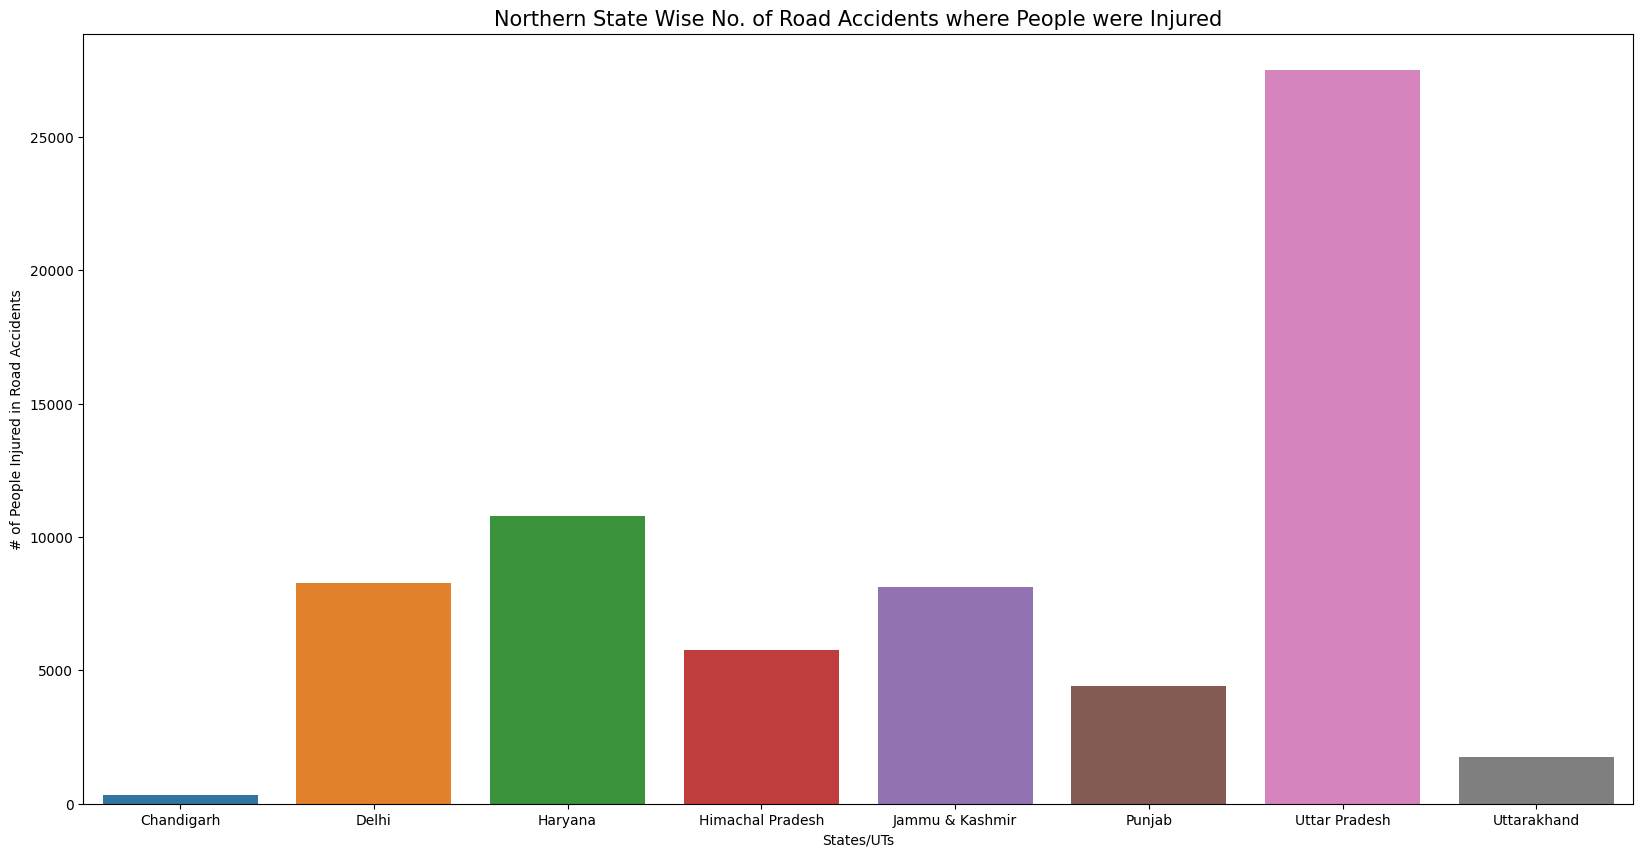

In [23]:
import warnings
warnings.filterwarnings('ignore')
sub_df = injured_df[injured_df['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Injured in Road Accidents')
    plt.title('Northern State Wise No. of Road Accidents where People were Injured', fontsize=15)

The top three states in the northern zone are Uttar Pradesh, Haryana and Delhi for most number of kills/injuries in road accidents.

# Weather Conditions - No. of People Killed in Road Accidents (North Zone)

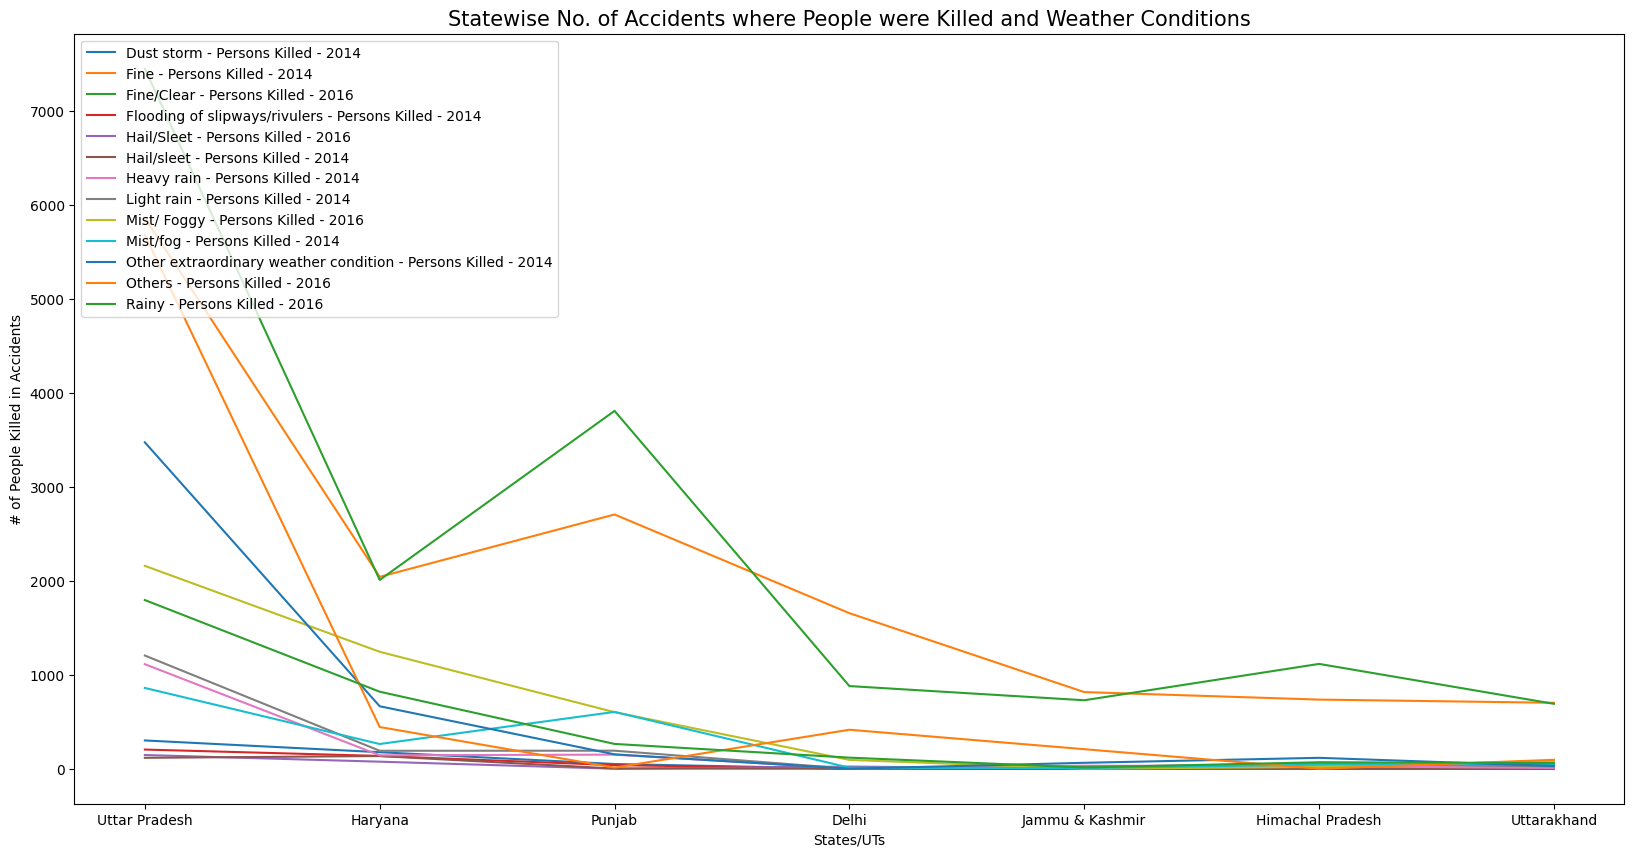

In [24]:
import warnings
warnings.filterwarnings('ignore')
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

The same pattern for weather continues for the northern states as well. Though here we see features which are appropriate for northern states - mist/foggy, hail etc.

# Weather Conditions - No. of People Injured in Road Accidents (North Zone)

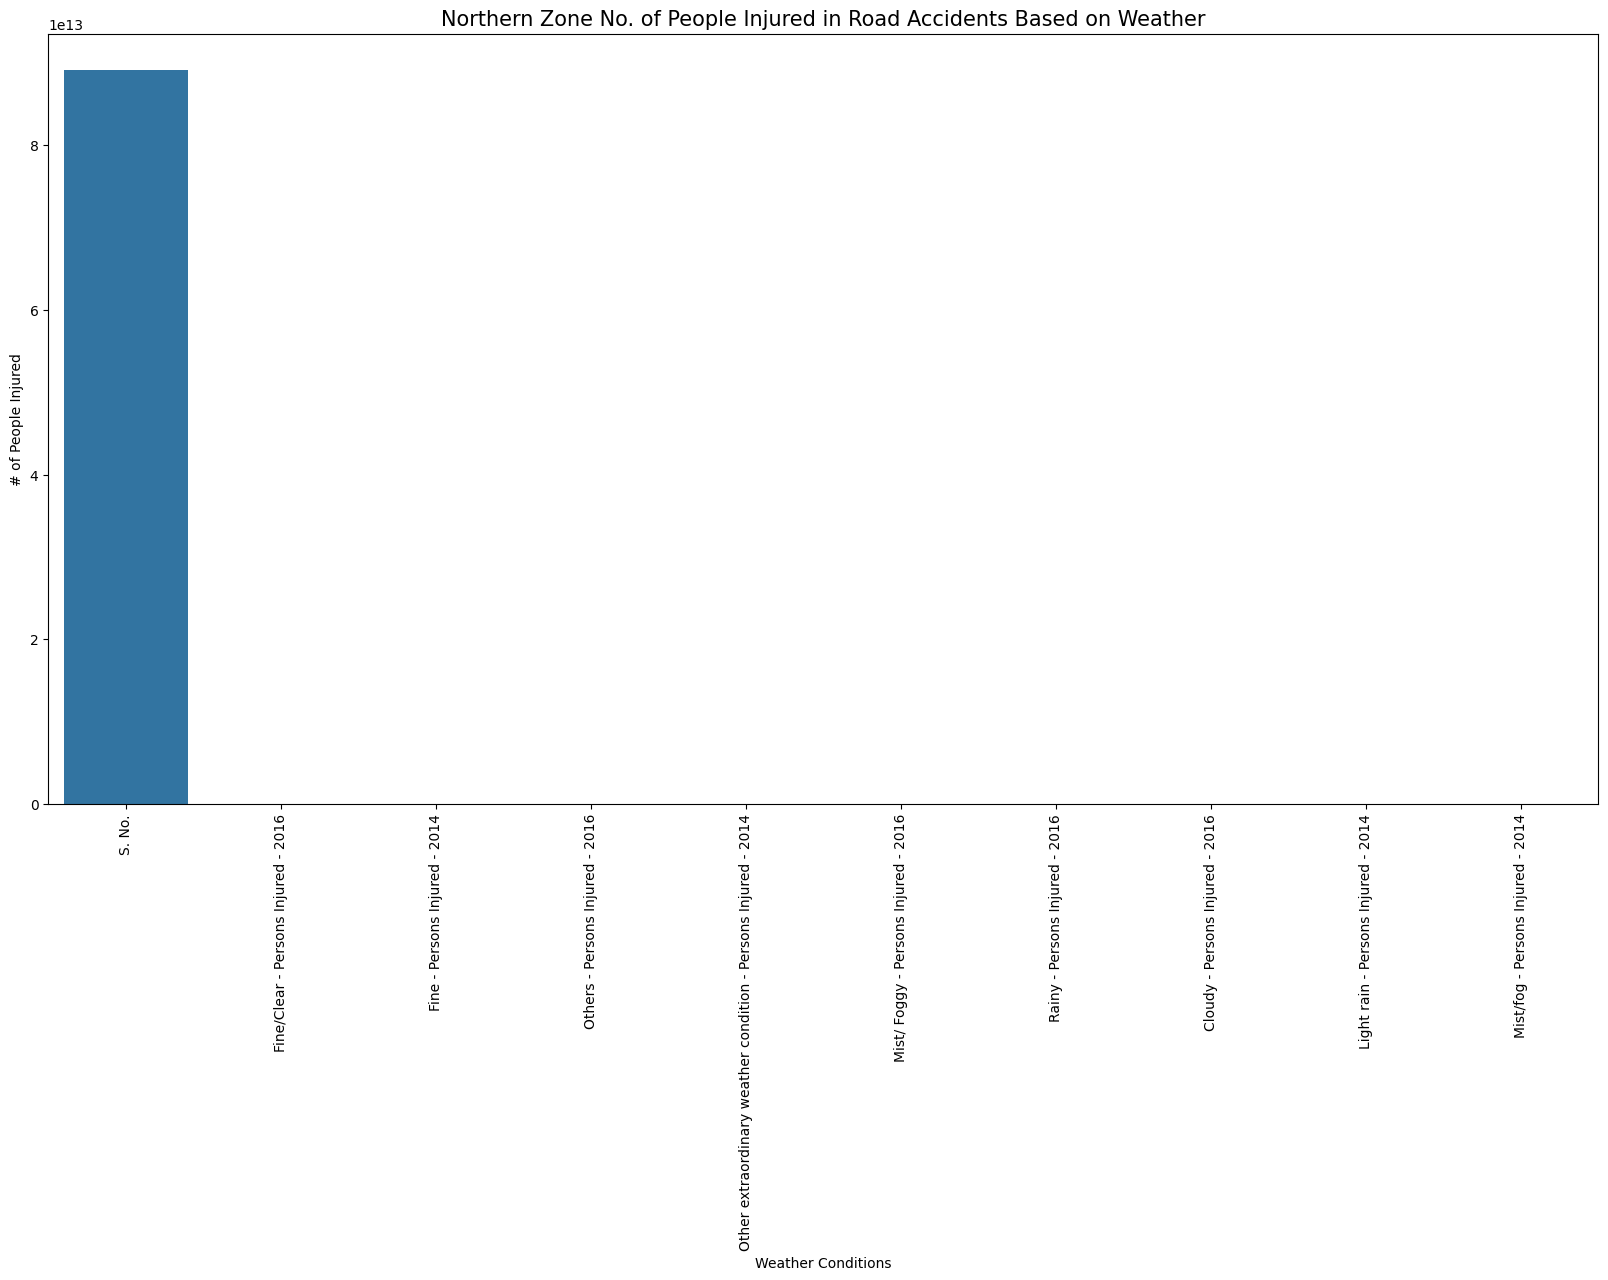

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming weather_df_injured is already loaded
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']

# Create pivot table with appropriate index and aggregation function
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc=np.sum).reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns
df = df.rename(columns={'index': 'Weather Conditions', 0: 'Total'})

# Drop the first row which could be a non-relevant index
df = df.drop(df.index[0])

# Convert 'Total' column to numeric values (this will turn invalid entries into NaN)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop any rows with NaN values (if necessary)
df = df.dropna()

# Sort by 'Total' in descending order and select top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the barplot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Weather Conditions'], y=df['Total'], ax=ax)

# Add labels and title
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

# Show the plot
plt.show()

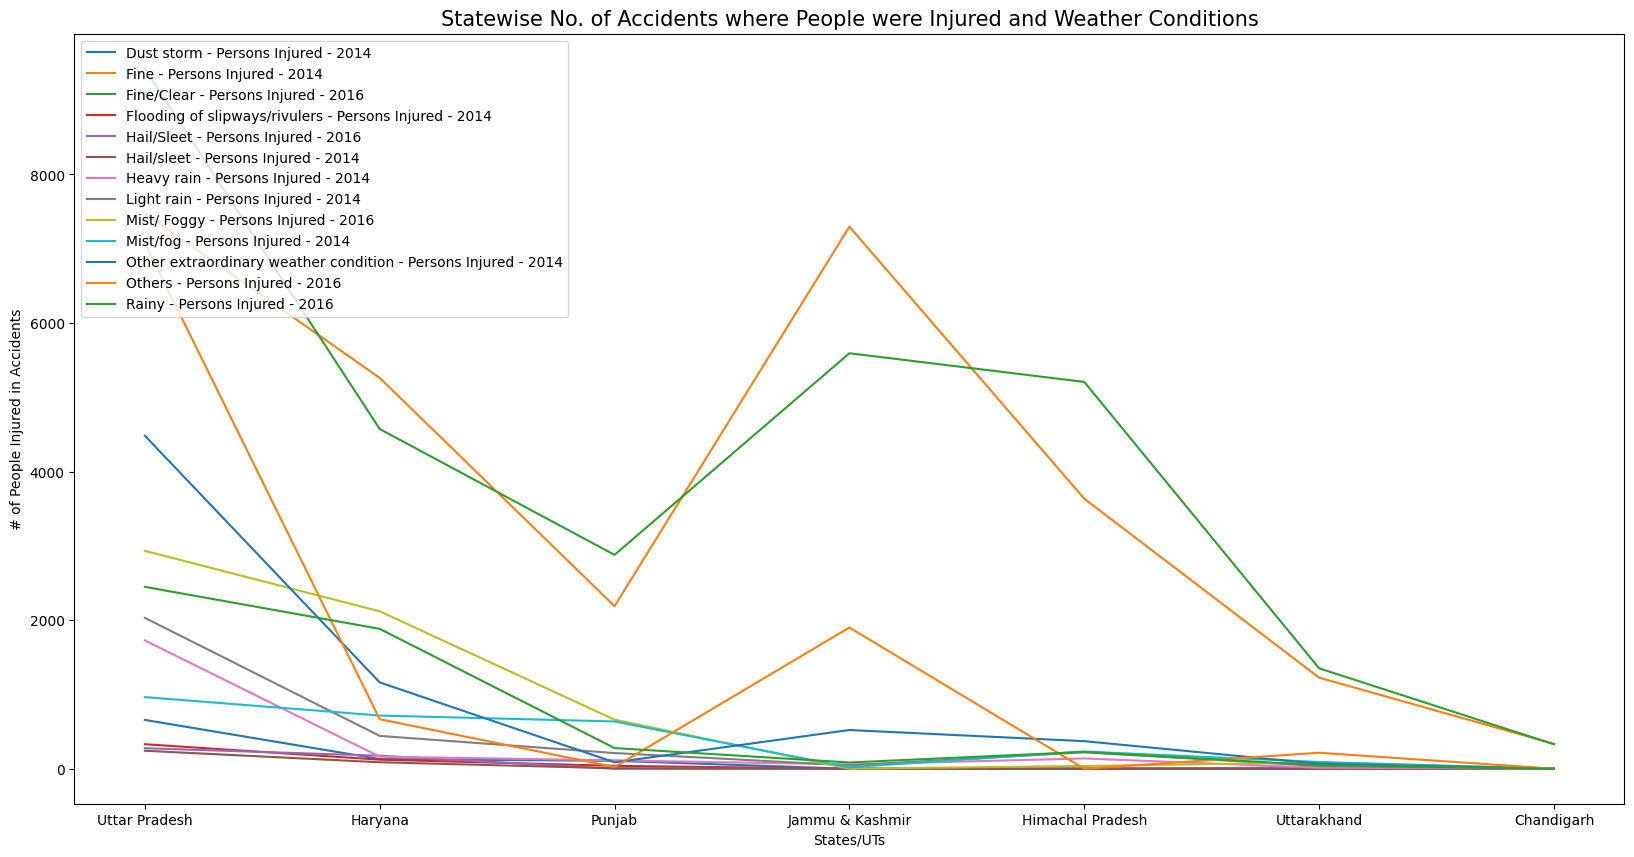

In [26]:
import warnings
warnings.filterwarnings('ignore')
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

# Road Conditions - No. of People Killed in Road Accidents (North Zone)

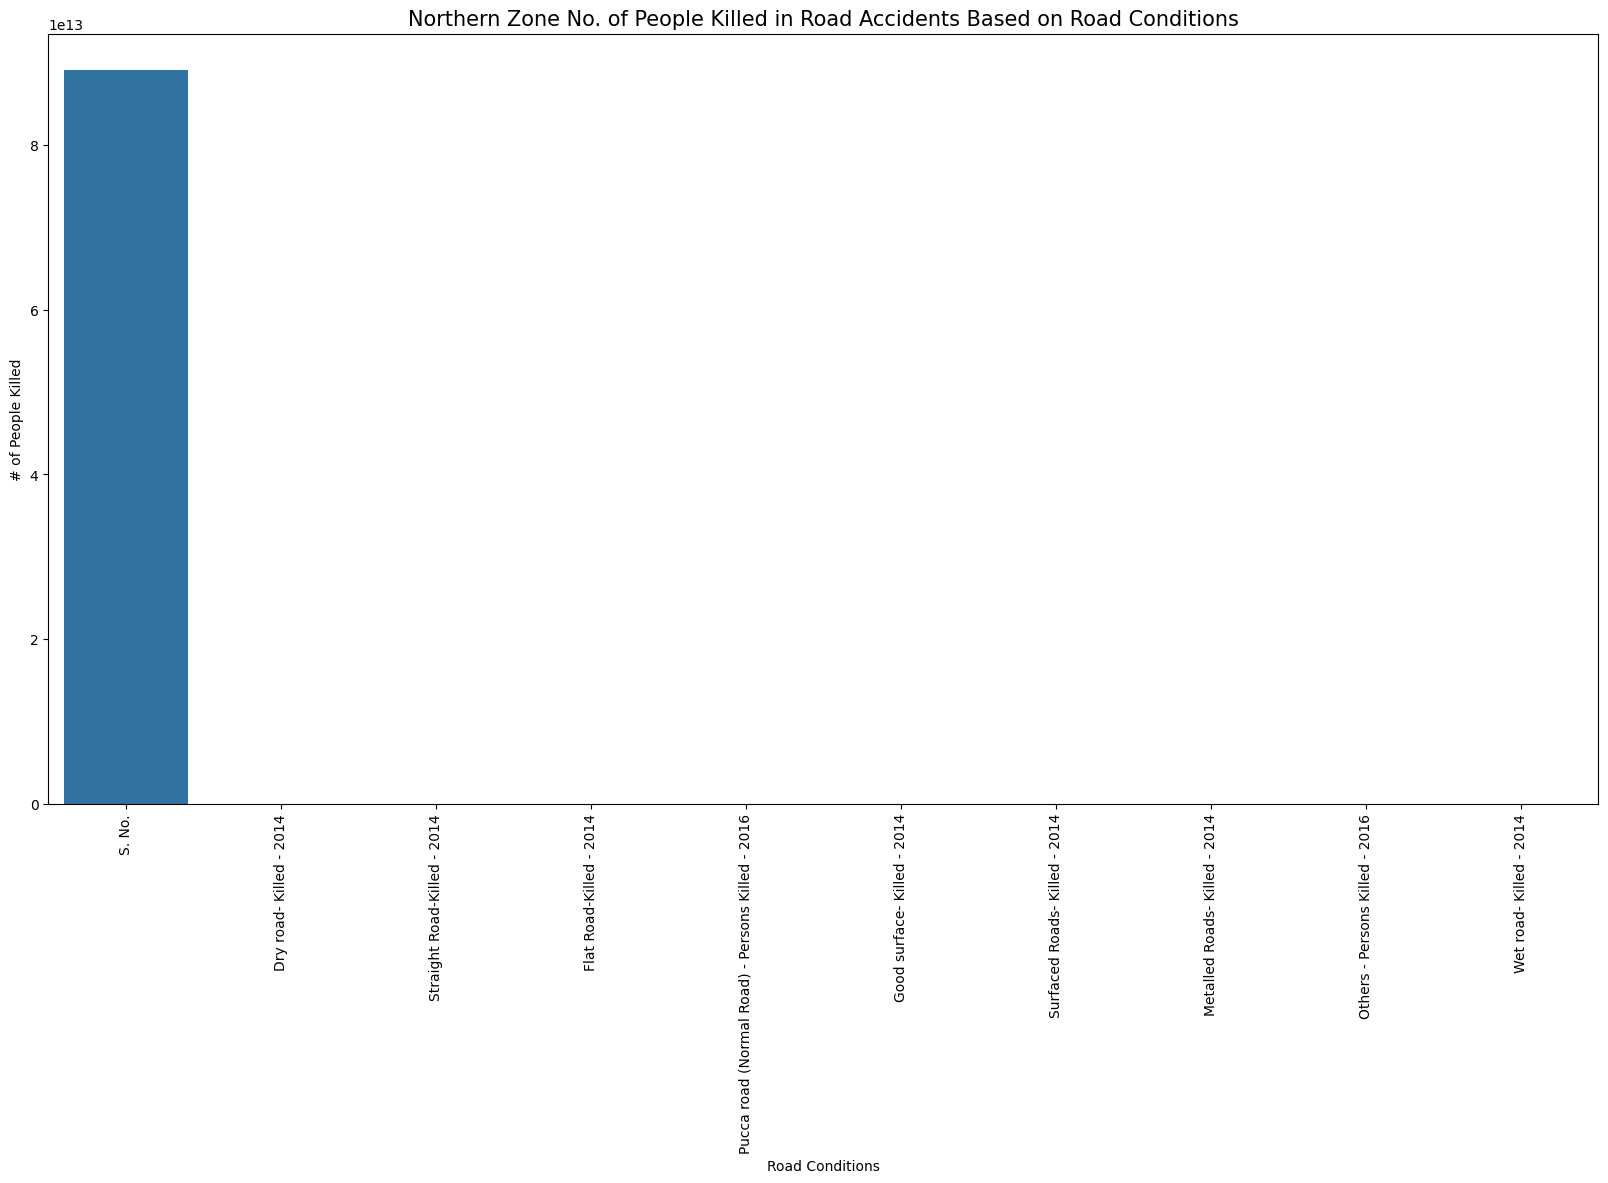

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming roadcond_df_killed is already loaded
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']

# Create pivot table with appropriate index and aggregation function
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc=np.sum).reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns
df = df.rename(columns={'index': 'Road Conditions', 0: 'Total'})

# Drop the first row which could be a non-relevant index
df = df.drop(df.index[0])

# Convert 'Total' column to numeric values (this will turn invalid entries into NaN)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop any rows with NaN values (if necessary)
df = df.dropna()

# Sort by 'Total' in descending order and select top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the barplot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Road Conditions'], y=df['Total'], ax=ax)

# Add labels and title
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

# Show the plot
plt.show()

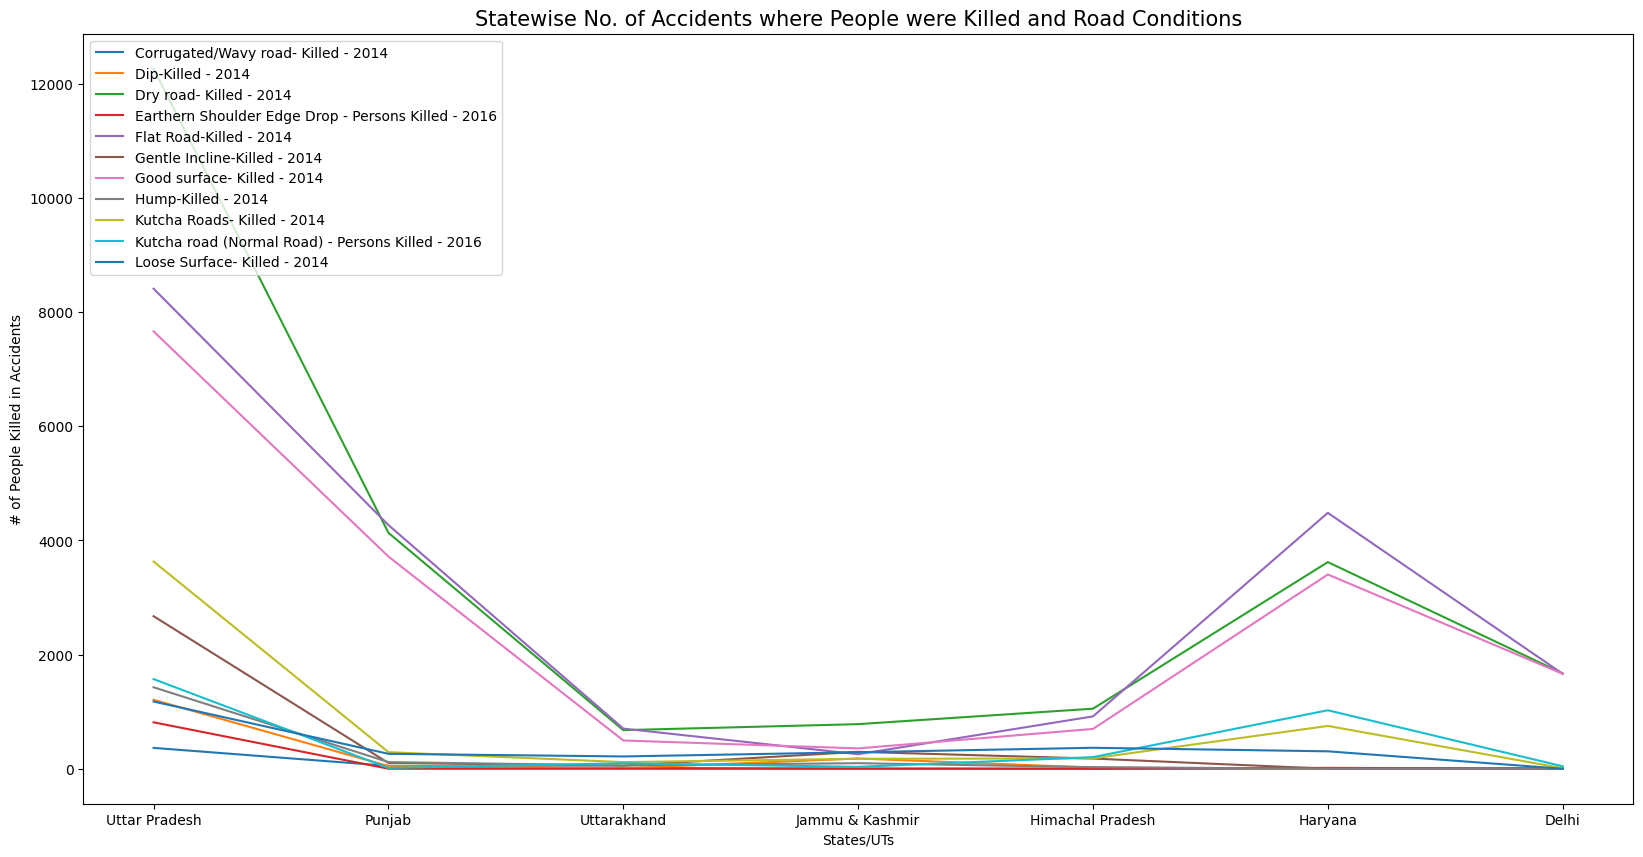

In [28]:
import warnings
warnings.filterwarnings('ignore')
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

# Road Conditions - No. of People Injured in Road Accidents (North Zone)

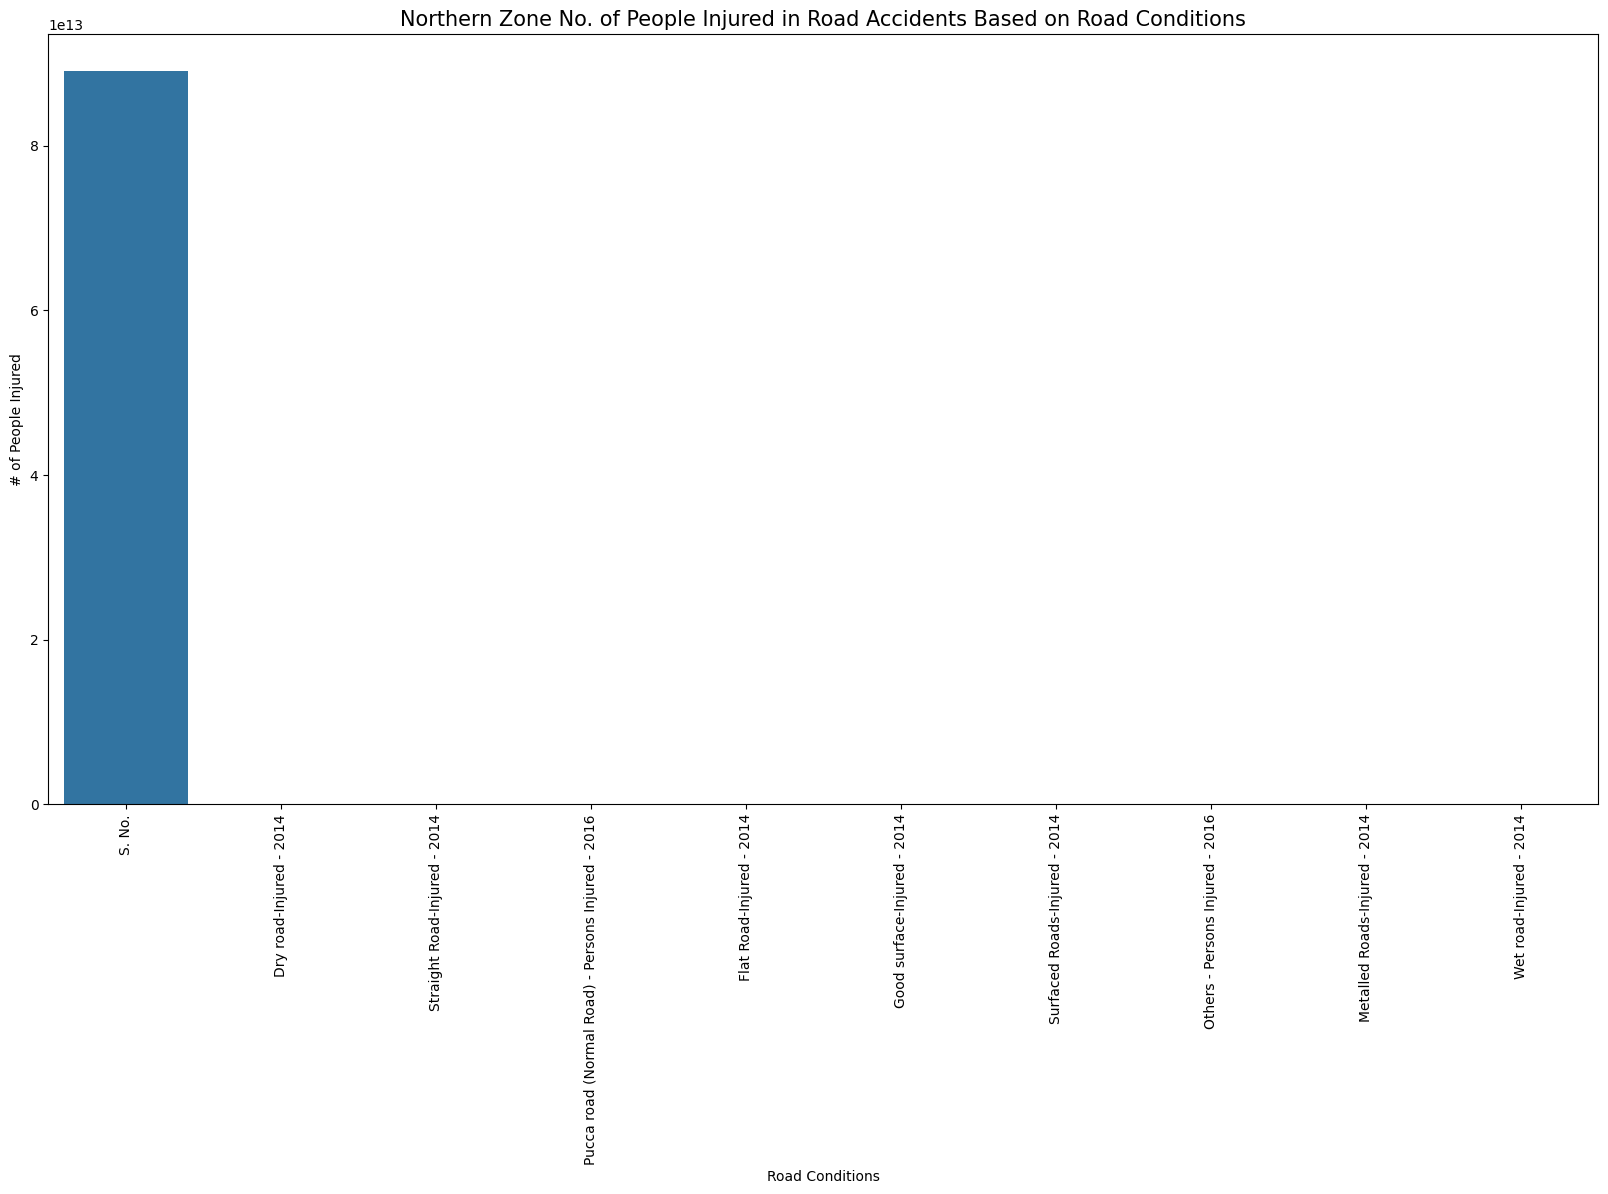

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming roadcond_df_injured is already loaded
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']

# Create pivot table with appropriate index and aggregation function
df = pd.pivot_table(sub_df, index=['Zones'], aggfunc=np.sum).reset_index()

# Transpose and reset index
df = df.T.reset_index()

# Rename columns
df = df.rename(columns={'index': 'Road Conditions', 0: 'Total'})

# Drop the first row which could be a non-relevant index
df = df.drop(df.index[0])

# Convert 'Total' column to numeric values (this will turn invalid entries into NaN)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop any rows with NaN values in the 'Total' column
df = df.dropna(subset=['Total'])

# Sort by 'Total' in descending order and select top 10
df = df.sort_values(by=['Total'], ascending=False).head(10)

# Plot the barplot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=df['Road Conditions'], y=df['Total'], ax=ax)

# Add labels and title
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

# Show the plot
plt.show()

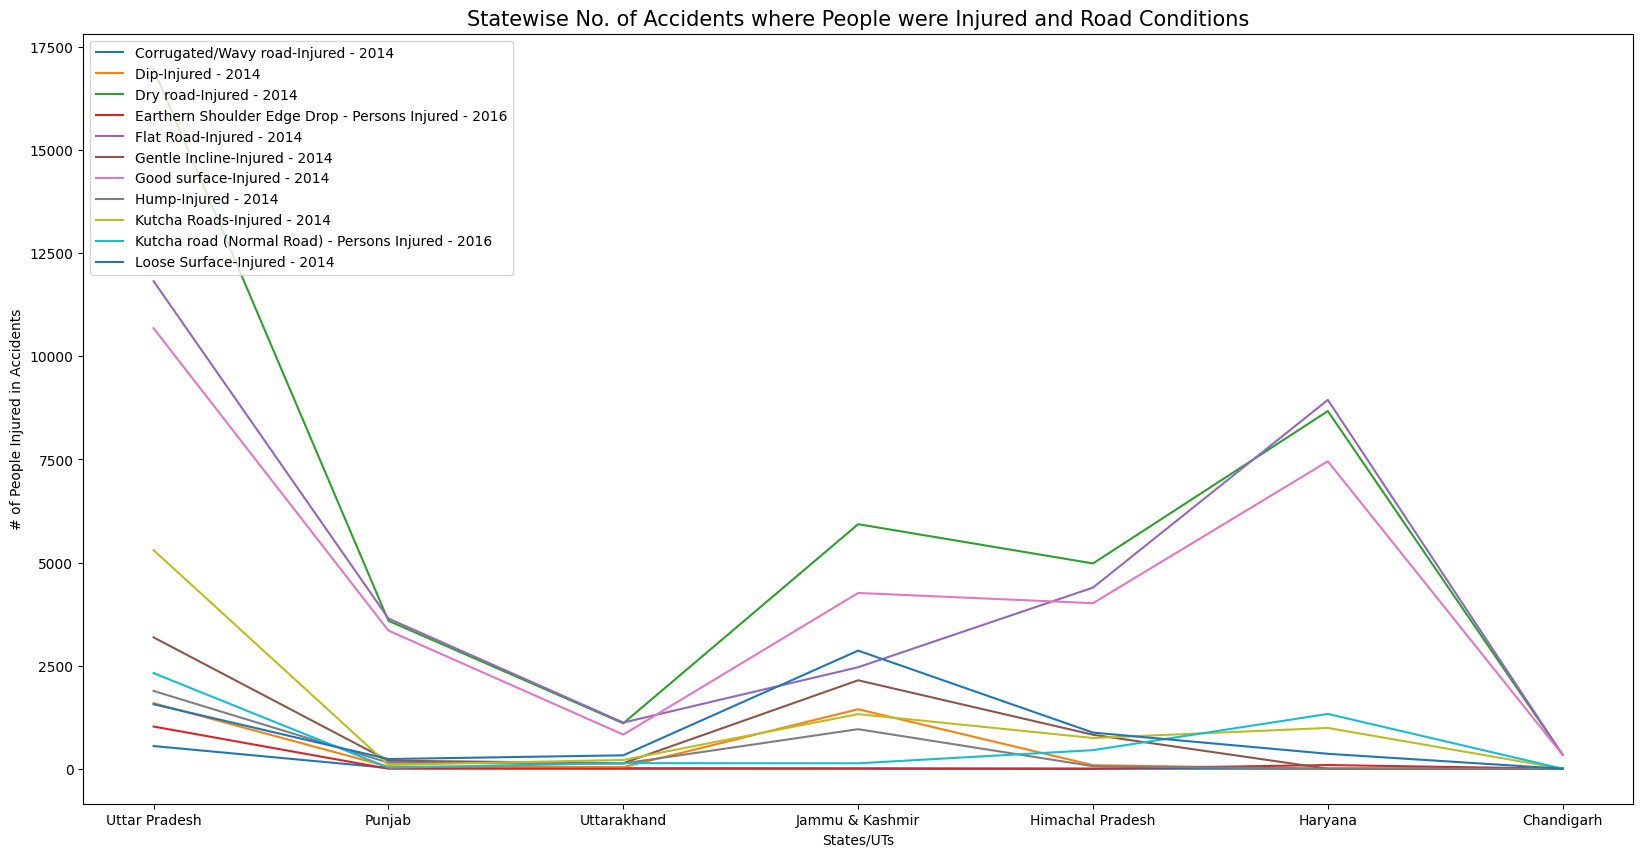

In [30]:
import warnings
warnings.filterwarnings('ignore')
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

A similar analysis can be done for Maharashtra. 

# Conclusion

Thus, we see how the data reflects the findings that have been published. It also cleared the common misconception that I had about weather and unruly/winding roads contributing to more no. of accidents. 

I'm going to end the kernel with this sweet link posted by the Govt. of Jharkhand which elaborates on the causes of road accidents. 
http://jhtransport.gov.in/causes-of-road-accidents.html


Drive safe everyone!!!